In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import aux.ts_functions as ts
import seaborn as sns
import numpy as np
import warnings
import os
import glob
from scipy.stats import pearsonr
from IPython.display import Image
from tabulate import tabulate

data_dir = "./../data/"

# biotoxins preprocessed

## Overall

In [4]:
data = pd.read_excel(data_dir + 'biotoxins_preprocessed.xlsx', engine="openpyxl")
#data = data.drop(columns=["Sample", "Sample_Point"]).sample(100)
data

,Sample,Species,Sample_Point,Production_Area,Date,dsp_toxins,asp_toxins,psp_toxins
0,1,Mexilhão,Jangada,LAL,2015-01-05,20.0,1.8,71.0
1,20,Berbigão,Canal do Espinheiro,RIAV3,2015-01-05,36.0,1.8,71.0
2,19,Berbigão,Costa Nova,RIAV2,2015-01-05,26.0,1.8,71.0
3,18,Berbigão,Moacha,RIAV1,2015-01-05,36.0,1.8,71.0
4,17,Amêijoa-branca,Torreira,L3,2015-01-05,36.0,1.8,71.0
...,...,...,...,...,...,...,...,...
13714,2211,Mexilhão,Povoação,POR2,2020-12-29,36.0,1.8,NaN
13715,2212,Mexilhão,Aljezur,L7a,2020-12-29,36.0,NaN,NaN
13716,2213,Mexilhão,Garganta,OLH4,2020-12-29,36.0,NaN,NaN
13717,2199,Mexilhão,Caparica,L5b,2020-12-29,36.0,1.8,71.0


In [5]:
for c in data.columns:
    print(c, "->", len(data[c].unique()))

Sample -> 2388
Species -> 23
Sample_Point -> 181
Production_Area -> 44
Date -> 1208
dsp_toxins -> 666
asp_toxins -> 127
psp_toxins -> 483


**Not preprocessed**

In [6]:
t = pd.read_excel(data_dir + 'biotoxins.xlsx', engine="openpyxl")
t

,Sample,Species,Sample_Point,Production_Area,Date,dsp_toxins,asp_toxins,psp_toxins
0,1,Mexilhão,Jangada,LAL,2015-01-05 00:00:00,20,ND,ND
1,2,A. Boa,Ria Formosa - Cacela,VT1,2015-01-05 00:00:00,20,ND,ND
2,3,Berbigão,Ria Formosa - Largura,FAR2,2015-01-05 00:00:00,15,ND,ND
3,4,Mexilhão,Jaulas Offshore,L8,2015-01-05 00:00:00,23,ND,ND
4,5,Mexilhão,Ria Formosa - Fortaleza,OLH2,2015-01-05 00:00:00,40,ND,ND
...,...,...,...,...,...,...,...,...
13714,2211,Mexilhão,Povoação,POR2,2020-12-29 00:00:00,NQ,NQ,NR
13715,2212,Mexilhão,Arrifana,L7a,2020-12-29 00:00:00,NQ,NR,NR
13716,2213,Mexilhão,Garganta,OLH4,2020-12-29 00:00:00,NQ,NR,NR
13717,2214,Ostra-japonesa/gigante,Parchal,POR3,2020-12-29 00:00:00,NQ,NR,NR


In [5]:
print("Number of NaNs and respective percentage per column\n")
table = []
for c in data.columns:
    table.append([c, data[c].isna().sum(), round(data[c].isna().sum()/data.shape[0],2)])
    
print(tabulate(table, headers=['Var', 'Nº NaNs', '% NaNs']))

Number of NaNs and respective percentage per column

Var                Nº NaNs    % NaNs
---------------  ---------  --------
Sample                   0      0
Species                  0      0
Sample_Point             0      0
Production_Area          0      0
Date                     0      0
dsp_toxins             372      0.03
asp_toxins            2660      0.19
psp_toxins            3446      0.25


In [6]:
print(data["Species"].value_counts())
print("-"*30)
print(f'{len(data["Species"].unique())} unique species')
print("-"*30)
print(f'{data["Species"].isna().sum()} NaN sample points')

Mexilhão                  6065
Berbigão                  2047
Ostra-japonesa/gigante     892
Conquilha                  844
Amêijoa-branca             788
Amêijoa-boa                778
Amêijoa-japonesa           559
Longueirão                 554
Amêijoa-macha              364
Lambujinha                 228
Pé-de-burrinho             150
Ostra                      128
Ostra-portuguesa            78
Ameijola                    77
Castanhola                  56
Amêijoa-cão                 37
A. asiática                 36
Amêijoa-relógio             19
Ostra-plana                 10
Telina                       5
Amêijoa                      2
Lapa                         1
Pé-burrinho                  1
Name: Species, dtype: int64
------------------------------
23 unique species
------------------------------
0 NaN sample points


In [7]:
print(data["Sample_Point"].value_counts()[:60])
print("-"*30)
print(f'{len(data["Sample_Point"].unique())} unique sample points')
print("-"*30)
print(f'{data["Sample_Point"].isna().sum()} NaN sample points')

Culatra                             662
Moacha                              593
Canal do Espinheiro                 563
Comporta                            479
Vale da Lama                        401
Caparica                            392
Sul da Ponte da Barra               379
Fortaleza                           377
Quatro Águas                        372
Monte Gordo                         352
Offshore                            340
Garganta                            330
Jangada                             313
Fuzeta                              311
Povoação                            307
Triângulo das Correntes             299
Marchil                             290
Porto Brandão                       288
Frente à Escola de Vela             288
Largura                             287
Aguda                               286
Porto de Mós                        266
Costa Nova                          265
Leça da Palmeira                    252
Regueira de Água Quente             250


In [8]:
print(data["Production_Area"].value_counts())
print("-"*30)
print(f'{len(data["Production_Area"].unique())} unique production areas')
print("-"*30)
print(f'{data["Production_Area"].isna().sum()} NaN sample points')

RIAV2    933
RIAV1    930
LOB      669
L6       619
RIAV3    612
L2       552
L5b      432
LAL      430
L8       426
LAG      401
ETJ1     399
TAV      377
OLH2     377
L9       352
RIAV4    351
L3       331
OLH4     330
OLH5     320
FUZ      311
POR2     307
L7c2     305
L1       300
L7c1     295
FAR1     290
FAR2     287
OLH1     250
OLH3     249
ESD2     238
VT       221
L5a      178
ELM      177
GUA      163
POR3     162
ESD1     161
L7a      159
EMN2     157
EMR      150
L4       145
EMN1     123
L7b      121
L5        58
EMI       36
L7c       26
ETJ2       9
Name: Production_Area, dtype: int64
------------------------------
44 unique production areas
------------------------------
0 NaN sample points


## Analysis of the relation between **Sample_Point** and **Production_Area**

In [9]:
for local in data["Sample_Point"].sort_values().unique():
    print(local)
    print(data[ data["Sample_Point"]==local ]["Production_Area"].unique())
    print("-"*30)

 Jusante da Ponte Eiffel
['ELM']
------------------------------
Aguda
['L2']
------------------------------
Albufeira
['L7c' 'L7c2']
------------------------------
Alcochete
['ETJ1']
------------------------------
Aljezur
['L7a']
------------------------------
Armona
['L8']
------------------------------
Baleal
['L5a']
------------------------------
Baliza Ferro
['ETJ1' 'ETJ2']
------------------------------
Baliza de Ferro
['ETJ1' 'ETJ2']
------------------------------
Base Aérea
['ETJ1']
------------------------------
Cacela
['VT']
------------------------------
Cacilhas
['ETJ1']
------------------------------
Canal Principal
['RIAV3']
------------------------------
Canal da Vaia
['ESD1']
------------------------------
Canal de Ilhavo
['RIAV4']
------------------------------
Canal de Mira
['RIAV2']
------------------------------
Canal de Vaia
['ESD1']
------------------------------
Canal de Ílhavo
['RIAV4']
------------------------------
Canal do Espinheiro
['RIAV3']
----------------

['POR3']
------------------------------
Rio Guadiana
['GUA']
------------------------------
Roncão
['EMR']
------------------------------
Roncão - Casa Branca
['EMR']
------------------------------
Roncão/Casa Branca
['EMR']
------------------------------
S. Martinho do Porto
['L4']
------------------------------
Sagres
['L7b']
------------------------------
Sagres - Cultura
['L7b']
------------------------------
Salgadeiras
['L6']
------------------------------
Samouco
['ETJ1']
------------------------------
Sesimbra
['L6']
------------------------------
Sines
['L6']
------------------------------
Sul da Ponte A25
['RIAV4']
------------------------------
Sul da Ponte da A25
['RIAV4']
------------------------------
Sul da Ponte da Barra
['RIAV2' 'RIAV1']
------------------------------
Sul ponte A25
['RIAV4']
------------------------------
São Vicente
['L7c']
------------------------------
Torre d'Aires
['TAV']
------------------------------
Torreira
['L3']
-----------------------------

A sample point can belong to different areas

In [10]:
for area in data["Production_Area"].sort_values().unique():
    print(area)
    print(data[ data["Production_Area"]==area ]["Sample_Point"].unique())
    print("-"*30)

ELM
['Est. Lima - Jusante Ponte EiFel' 'Est. Lima - Jusante Ponte EiFe'
 'Est. Lima - Jusante Ponte Eiffel' 'Montante da Ponte Eiffel'
 'Jusante da Ponte' 'Jusante Ponte Eiffel' ' Jusante da Ponte Eiffel']
------------------------------
EMI
['Est. Minho _Vila Nova Cerveira' 'Est. Minho - Vila Nova Cerveira'
 'Est. Minho -Vila Nova Cerveira']
------------------------------
EMN1
['Murraceira Norte' 'Morraceira Norte']
------------------------------
EMN2
['Murraceira sul' 'Murraceira Sul' 'Entrada Braço Sul' 'Morraceira Sul'
 'Morraceira sul']
------------------------------
EMR
['Jusante da Ponte' 'Est. Mira' 'Est. Mira - Roncão' 'Est.Mira -Roncão'
 'Est. Mira – Casa Branca' 'a Roncão- Casa branca'
 'Est. Mira - Casa Branca' 'Roncão/Casa Branca' 'Estuário do Mira'
 'Estuario do Mira - Roncão' 'Roncão' 'Roncão - Casa Branca' 'Troviscais'
 'Frente ao ISN']
------------------------------
ESD1
['Est. Sado - Faralhão' 'Est. Sado - Canal da Vaia' 'Canal de Vaia'
 'Est. Sado - Gâmbia' 'stuário d

A production area usually encompasses multiple locations

## Production Area

In [20]:
print(data["Production_Area"].unique(), "\n")
print(len(data["Production_Area"].unique()), "\n")
print(len( data[data["Production_Area"] == "L7c"] ), "\n")

['LAL' 'RIAV3' 'RIAV2' 'RIAV1' 'L3' 'RIAV4' 'L2' 'L9' 'FAR2' 'L8' 'FAR1'
 'OLH2' 'VT' 'POR2' 'LAG' 'OLH3' 'OLH4' 'L7a' 'L1' 'FUZ' 'OLH5' 'EMN2'
 'LOB' 'L7c2' 'L7c1' 'L5a' 'ESD2' 'L6' 'ESD1' 'OLH1' 'L5b' 'TAV' 'ETJ1'
 'EMR' 'EMI' 'ELM' 'L7c' 'EMN1' 'L5' 'L4' 'POR3' 'L7b' 'GUA' 'ETJ2'] 

44 

26 



In [24]:
data["Production_Area"].value_counts()

RIAV2    933
RIAV1    930
LOB      669
L6       619
RIAV3    612
L2       552
L5b      432
LAL      430
L8       426
LAG      401
ETJ1     399
TAV      377
OLH2     377
L9       352
RIAV4    351
L3       331
OLH4     330
OLH5     320
FUZ      311
POR2     307
L7c2     305
L1       300
L7c1     295
FAR1     290
FAR2     287
OLH1     250
OLH3     249
ESD2     238
VT       221
L5a      178
ELM      177
GUA      163
POR3     162
ESD1     161
L7a      159
EMN2     157
EMR      150
L4       145
EMN1     123
L7b      121
L5        58
EMI       36
L7c       26
ETJ2       9
Name: Production_Area, dtype: int64

## Date Analysis

In [12]:
print(data["Date"].min())
print(data["Date"].max())

2015-01-05 00:00:00
2020-12-29 00:00:00


In [17]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    display(data[data["Sample_Point"]=="Caparica"].sort_values("Date").head(100))

,Sample,Species,Sample_Point,Production_Area,Date,dsp_toxins,asp_toxins,psp_toxins
38,38,Mexilhão,Caparica,L5b,2015-01-07,36.0,1.8,71.0
77,72,Mexilhão,Caparica,L5b,2015-01-14,38.0,1.8,71.0
111,105,Mexilhão,Caparica,L5b,2015-01-21,36.0,1.8,71.0
153,145,Mexilhão,Caparica,L5b,2015-01-28,25.0,1.8,71.0
198,183,Mexilhão,Caparica,L5b,2015-02-04,23.0,1.8,71.0
203,195,Mexilhão,Caparica,L5b,2015-02-09,16.0,1.8,71.0
269,253,Mexilhão,Caparica,L5b,2015-02-19,36.0,1.8,71.0
311,301,Mexilhão,Caparica,L5b,2015-02-26,36.0,1.8,71.0
366,414,Mexilhão,Caparica,L5b,2015-03-20,36.0,1.8,71.0
408,456,Mexilhão,Caparica,L5b,2015-03-25,29.0,1.8,71.0


Mexilhão           218
Amêijoa-branca      76
Amêijoa-relógio      6
Name: Species, dtype: int64

 -------------------------------------------------- 

Mexilhão           251
Amêijoa-branca     240
Castanhola          42
Amêijoa-relógio     12
Telina               5
Pé-de-burrinho       1
Lapa                 1
Name: Species, dtype: int64

 -------------------------------------------------- 

Amêijoa-branca    191
Mexilhão          127
Castanhola         13
Name: Species, dtype: int64

 -------------------------------------------------- 

Mexilhão          82
Amêijoa-branca    61
Conquilha          1
Castanhola         1
Name: Species, dtype: int64

 -------------------------------------------------- 

Mexilhão    178
Name: Species, dtype: int64

 -------------------------------------------------- 

Mexilhão          282
Conquilha          92
Longueirão         55
Amêijoa-branca      3
Name: Species, dtype: int64

 -------------------------------------------------- 



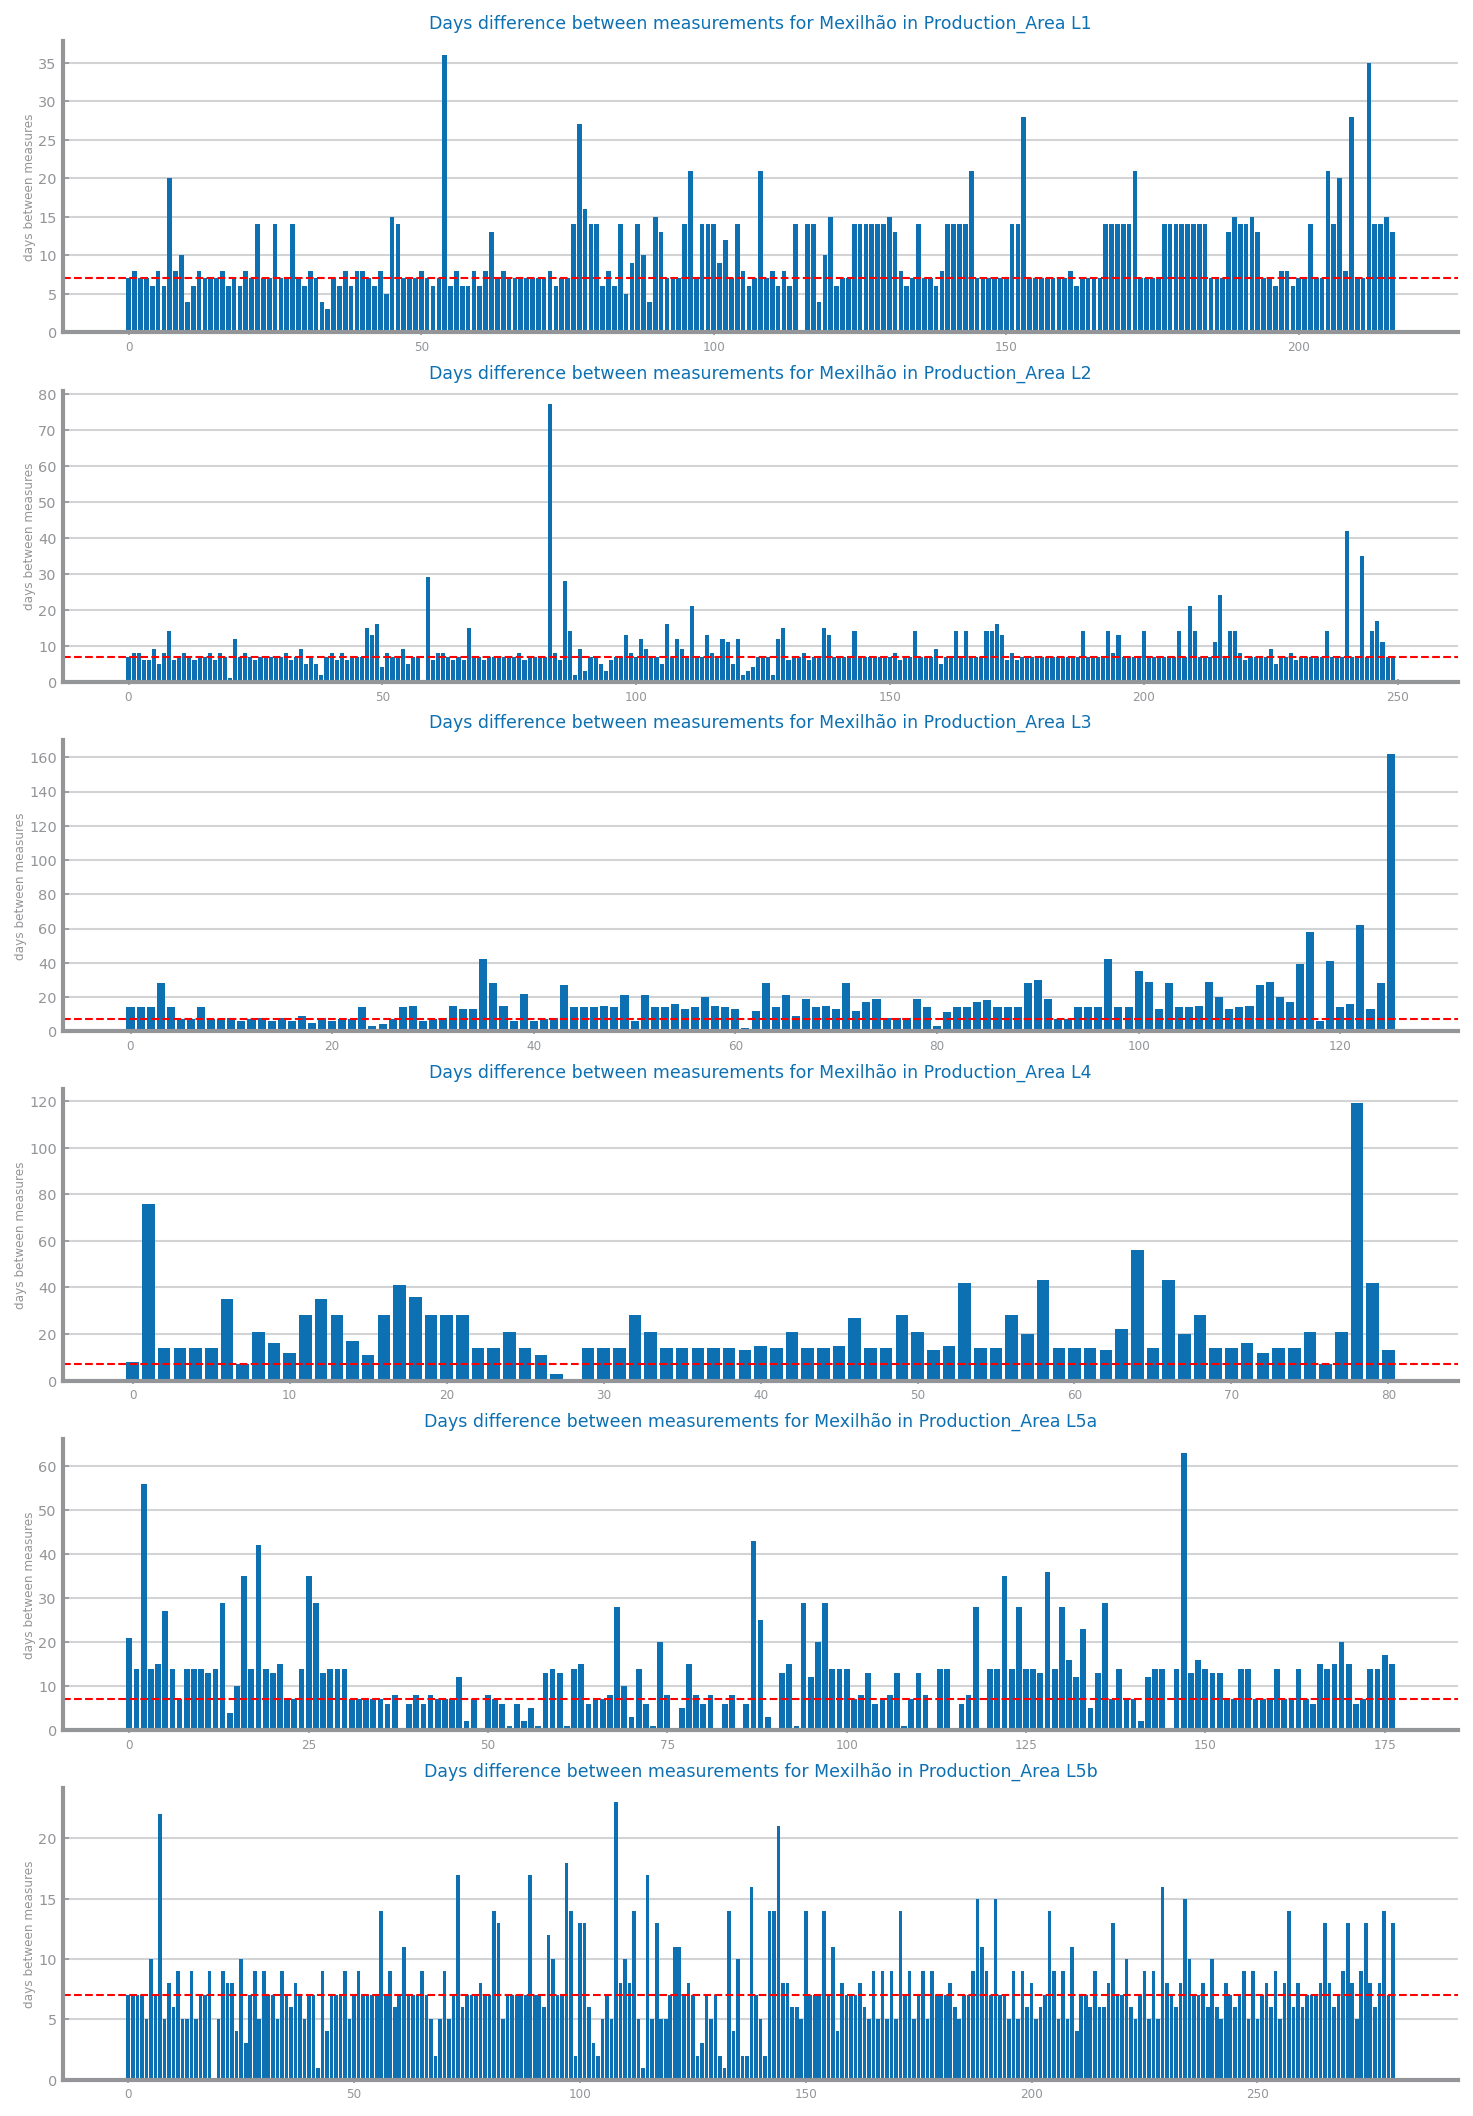

In [18]:
location_type = ["Production_Area"]*6 #Production_Area or Sample_Point
location = ["L1", "L2" ,"L3", "L4", "L5a", "L5b"]
specie = ["Mexilhão"]*6

def plot_differences(location_type, location, specie, ax):
    print(data[ data[location_type] == location ]["Species"].value_counts(dropna=False))
    print("\n", "-"*50, "\n")
    ameijoa = data[ (data[location_type] == location) & (data["Species"] == specie) ]

    days = []
    dates = ameijoa["Date"].tolist()
    for i in range(1, len(dates)):
        diff = dates[i] - dates[i-1]
        days.append(diff.days)

    ax.bar(range(len(days)), days)
    ax.axhline(7, linestyle="--", color="r", linewidth=1)
    ax.set_ylabel("days between measures")
    ax.set_title(f"Days difference between measurements for {specie} in {location_type} {location}")

    
fig, ax = plt.subplots(6,1,figsize=(12,18))
ax = ax.flatten()


for i in range(len(ax)):
    plot_differences(location_type[i], location[i], specie[i], ax[i])
    
plt.show()

Mexilhão           218
Amêijoa-branca      76
Amêijoa-relógio      6
Name: Species, dtype: int64

 -------------------------------------------------- 



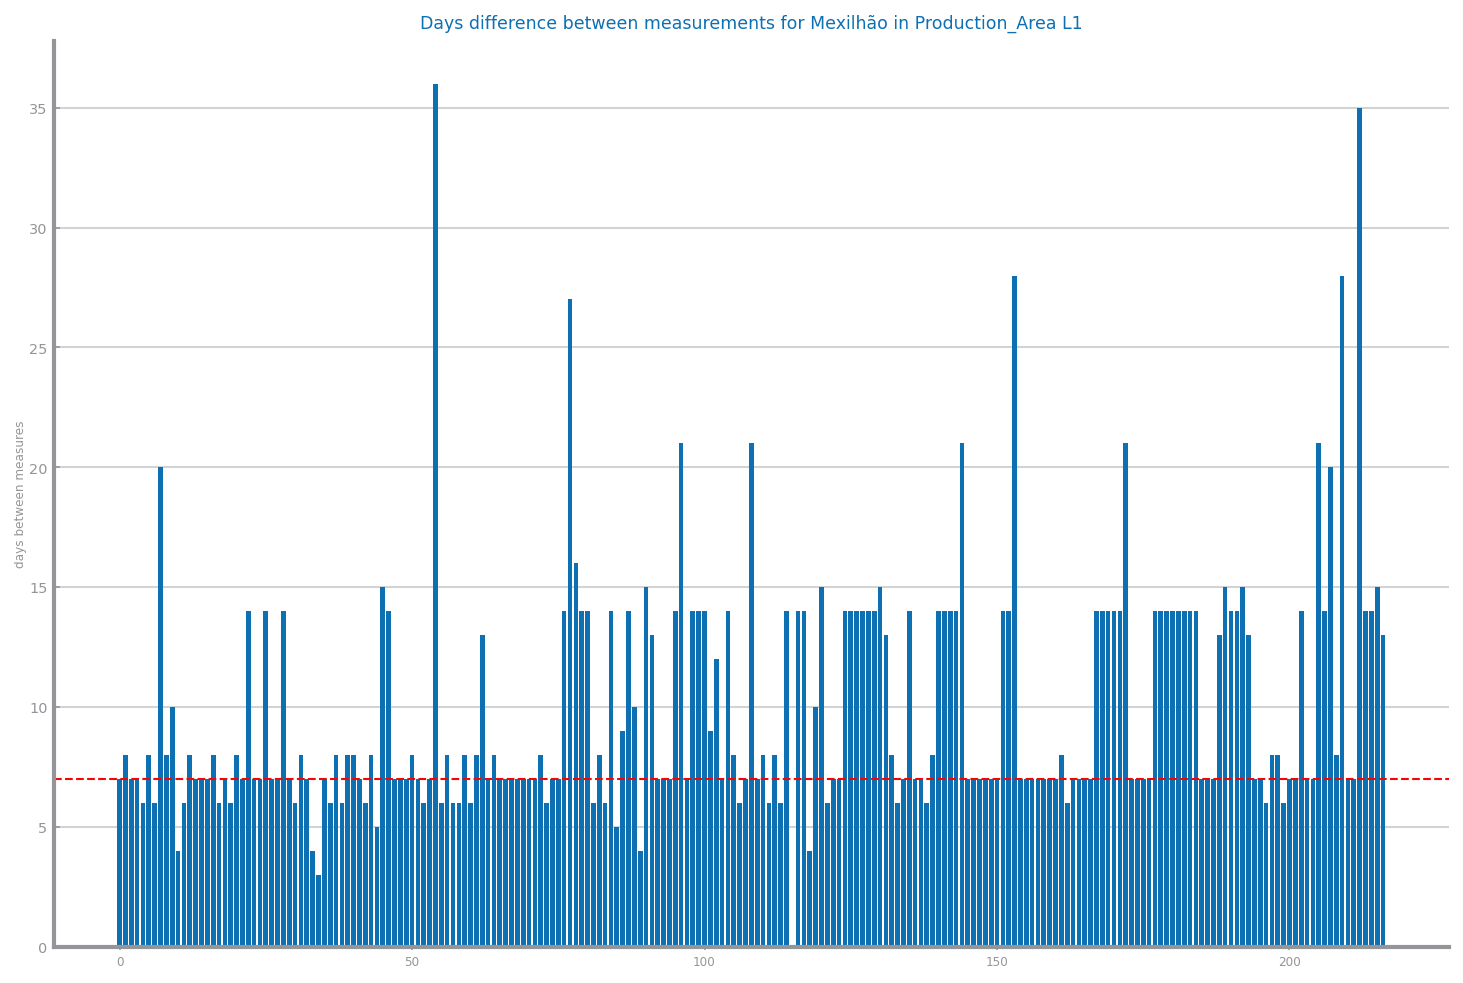

In [19]:
location_type = "Production_Area" #Production_Area or Sample_Point
location = "L1"
specie = "Mexilhão"

fig, ax = plt.subplots(1,1,figsize=(12,8))

plot_differences(location_type, location, specie, ax)
    
plt.show()

## Toxins

### Overall

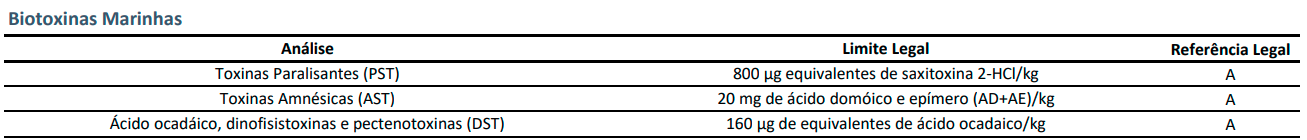

In [20]:
display(Image(filename="images/limit_bio.png"))


2018


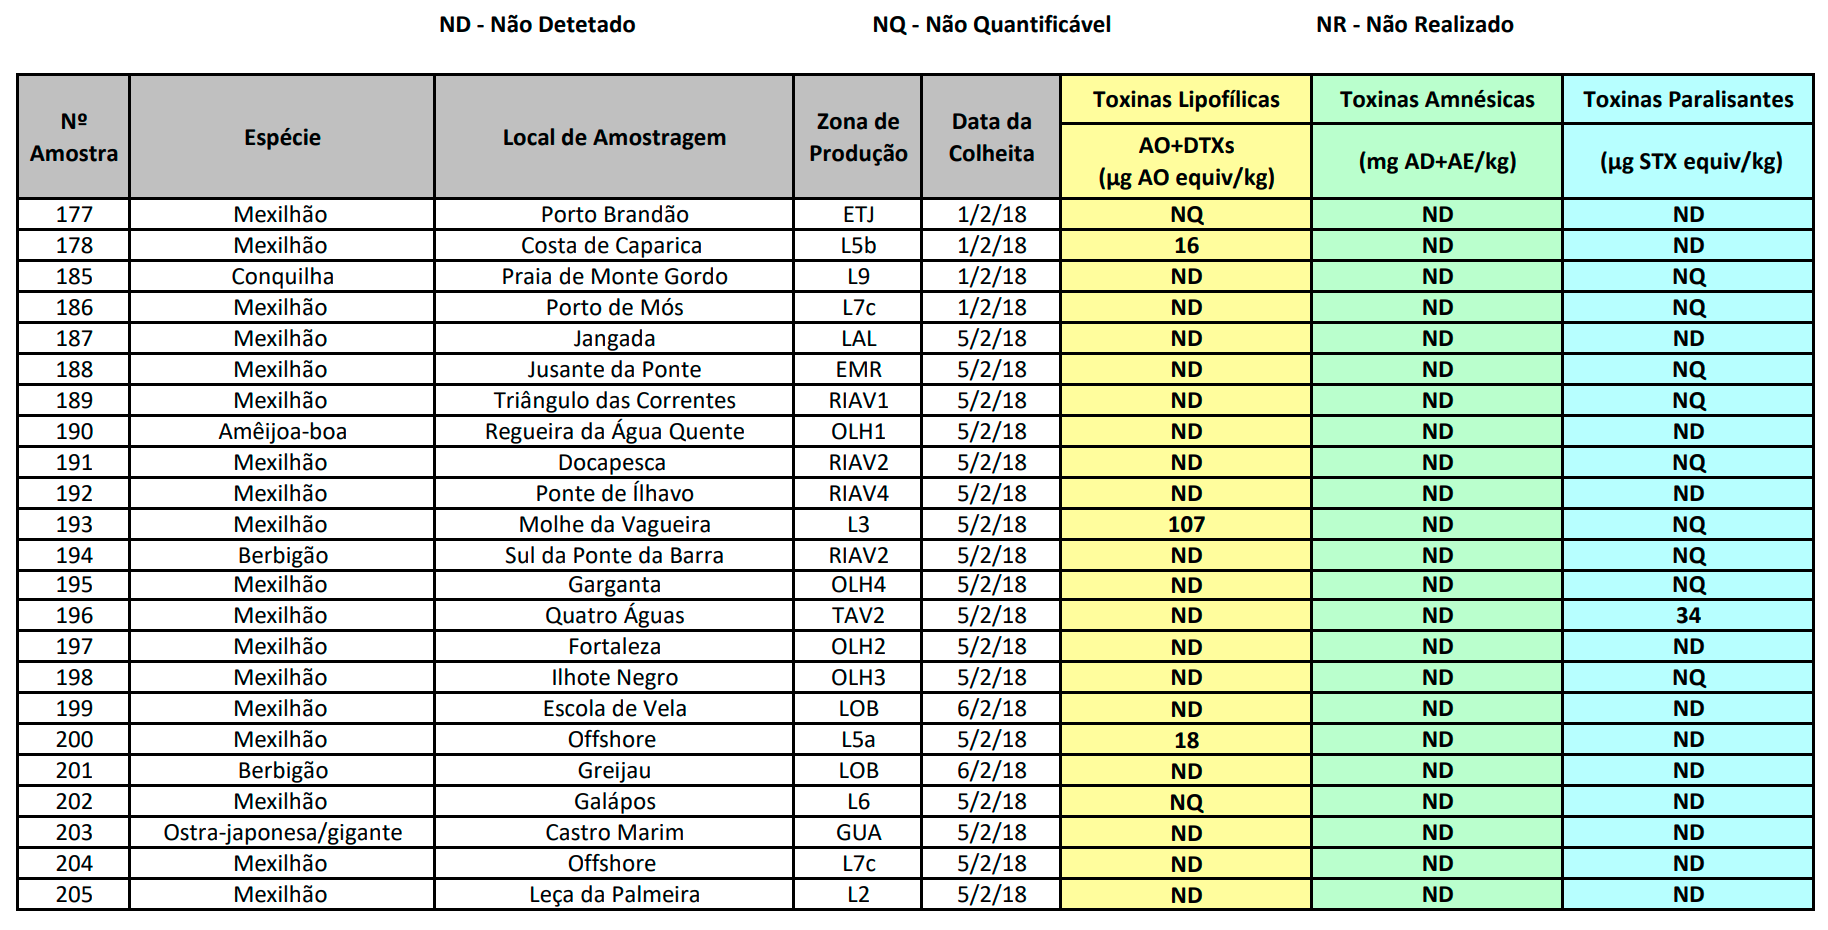

,Sample,Species,Sample_Point,Production_Area,Date,dsp_toxins,asp_toxins,psp_toxins
7199,177,Mexilhão,Porto Brandão,ETJ1,2018-02-01,36.0,1.8,71.0
7200,178,Mexilhão,Caparica,L5b,2018-02-01,16.0,1.8,71.0
7198,185,Conquilha,Monte Gordo,L9,2018-02-01,36.0,1.8,71.0
7197,186,Mexilhão,Porto de Mós,L7c2,2018-02-01,36.0,1.8,71.0
7212,187,Mexilhão,Jangada,LAL,2018-02-05,36.0,1.8,71.0
7213,188,Mexilhão,Jusante da Ponte,EMR,2018-02-05,36.0,1.8,71.0
7214,189,Mexilhão,Triângulo das Correntes,RIAV1,2018-02-05,36.0,1.8,71.0
7210,190,Amêijoa-boa,Regueira de Água Quente,OLH1,2018-02-05,36.0,1.8,71.0
7215,191,Mexilhão,Docapesca,RIAV2,2018-02-05,36.0,1.8,71.0
7217,192,Mexilhão,Ponte A25,RIAV4,2018-02-05,36.0,1.8,71.0


2020


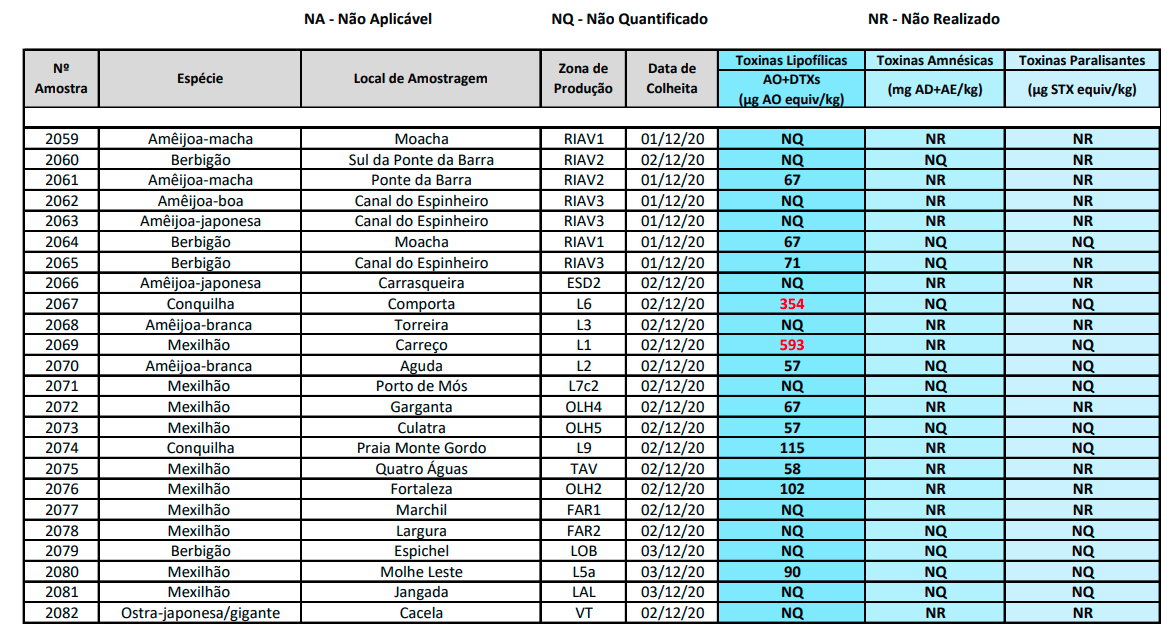

,Sample,Species,Sample_Point,Production_Area,Date,dsp_toxins,asp_toxins,psp_toxins
13566,2059,Amêijoa-macha,Moacha,RIAV1,2020-12-01,36.0,NaN,NaN
13568,2060,Berbigão,Sul da Ponte da Barra,RIAV2,2020-12-02,36.0,1.8,NaN
13567,2061,Amêijoa-macha,Sul da Ponte da Barra,RIAV2,2020-12-01,67.0,NaN,NaN
13564,2062,Amêijoa-boa,Canal do Espinheiro,RIAV3,2020-12-01,36.0,NaN,NaN
13563,2063,Amêijoa-japonesa,Canal do Espinheiro,RIAV3,2020-12-01,36.0,NaN,NaN
13565,2064,Berbigão,Moacha,RIAV1,2020-12-01,67.0,1.8,71.0
13562,2065,Berbigão,Canal do Espinheiro,RIAV3,2020-12-01,71.0,1.8,NaN
13579,2066,Amêijoa-japonesa,Carrasqueira,ESD2,2020-12-02,36.0,NaN,NaN
13580,2067,Conquilha,Comporta,L6,2020-12-02,354.0,1.8,71.0
13583,2068,Amêijoa-branca,Torreira,L3,2020-12-02,36.0,NaN,NaN


In [21]:
print("2018")
display(Image(filename="images/biotoxins_data1.png"))
display(data[ (data["Date"].dt.year==2018) & (data["Date"].dt.month==2)].sort_values("Sample").head(10))

print("2020")
display(Image(filename="images/biotoxins_data2.png"))
display(data[ (data["Date"].dt.year==2020) & (data["Date"].dt.month==12)].sort_values("Sample").head(11))


Logo:  

|       | DSP | ASP | PSP |
|:-----:|:---:|-----|-----|
| NQ/ND |  36 | 1.8 | 71  |
|   NR  | NaN | NaN | NaN |

### NaNs in toxins

In [22]:
toxins = data[["dsp_toxins", "asp_toxins", "psp_toxins"]].copy()

with warnings.catch_warnings(record=True):
    toxins[toxins.notna()] = "Not NaN"
    toxins[toxins.isna()] = "NaN"

#display(toxins)

display(pd.crosstab(toxins["dsp_toxins"], [toxins["asp_toxins"], toxins["psp_toxins"]]))
display(pd.crosstab(toxins["dsp_toxins"], [toxins["asp_toxins"], toxins["psp_toxins"]], normalize='all').round(decimals=3))


asp_toxins   NaN         Not NaN        
psp_toxins   NaN Not NaN     NaN Not NaN
dsp_toxins                              
NaN           48     163      77      84
Not NaN     2222     227    1099    9799

asp_toxins    NaN         Not NaN        
psp_toxins    NaN Not NaN     NaN Not NaN
dsp_toxins                               
NaN         0.003   0.012   0.006   0.006
Not NaN     0.162   0.017   0.080   0.714

### Defaults + NaNs in toxins

In [59]:
toxins = data[["dsp_toxins", "asp_toxins", "psp_toxins"]].copy()

for t in toxins.columns:
    m = toxins[t].mode()[0]
    toxins.loc[toxins[t] == m, t] = np.nan
    
toxins.isna().sum()/toxins.shape[0]

dsp_toxins    0.452074
asp_toxins    0.967417
psp_toxins    0.928275
dtype: float64

### Toxins distributions

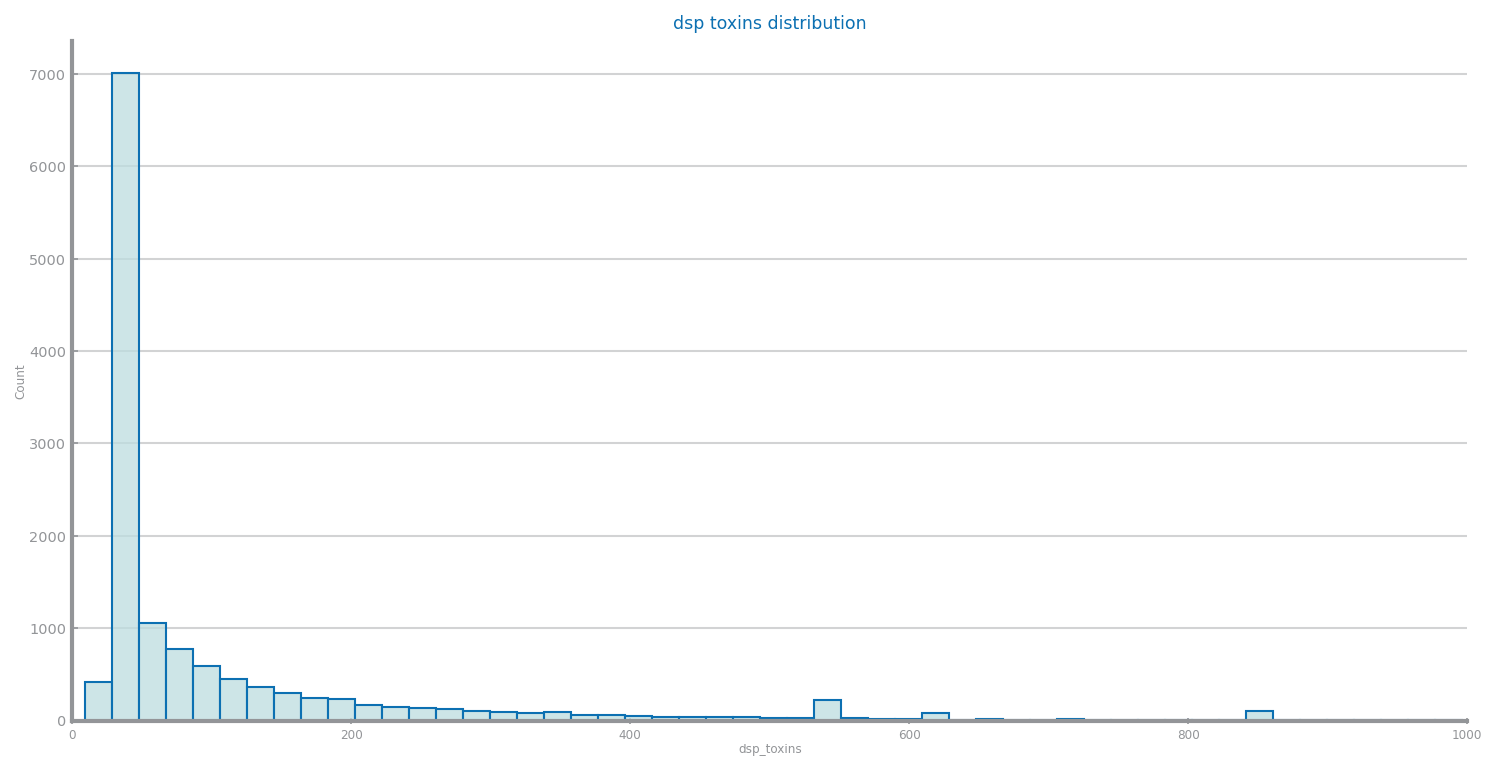

max: 1945.0	min: 9.0	mode: 36.0 x42.50%	mean: 110.58249044729152 +- 148.68860067228695


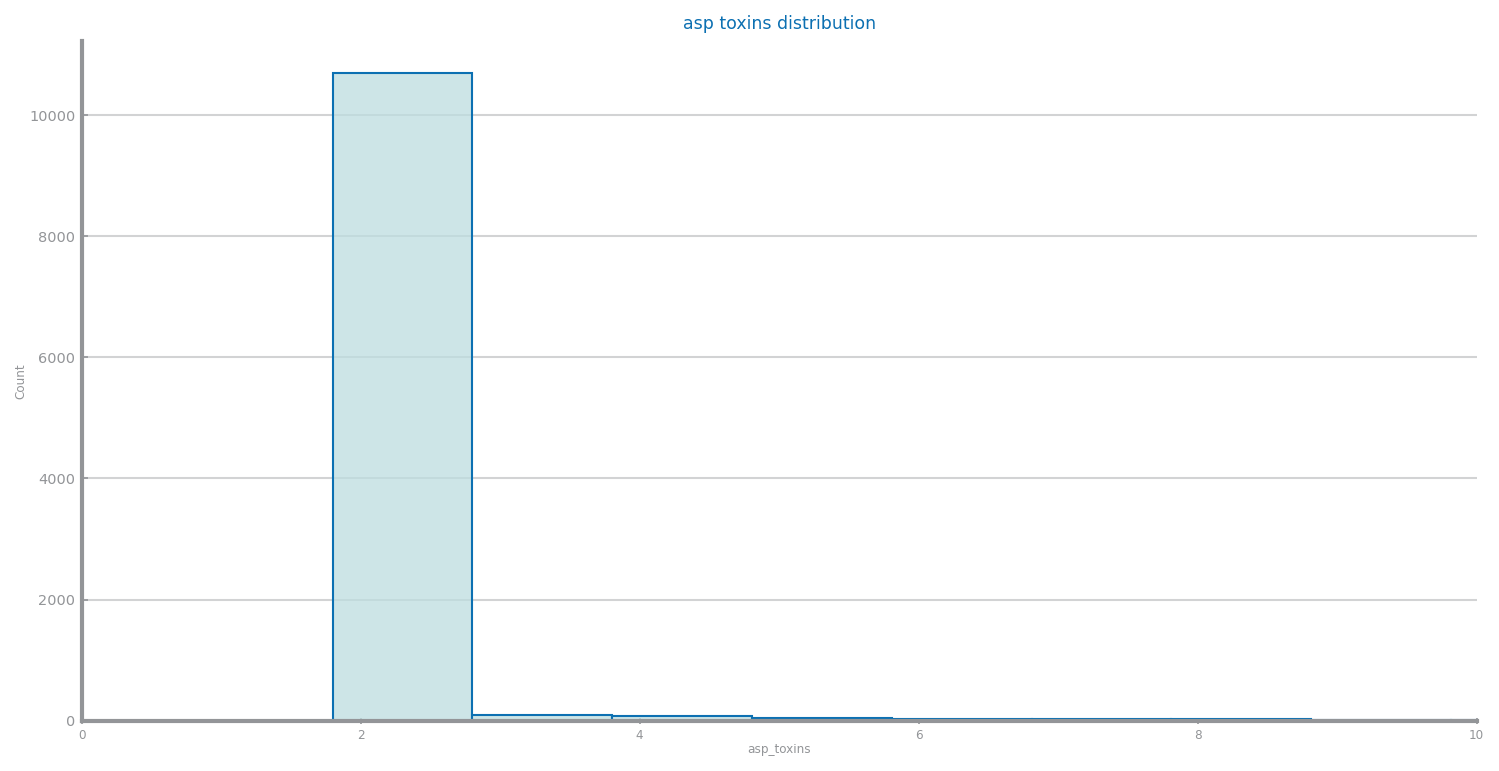

max: 102.0	min: 1.8	mode: 1.8 x77.35%	mean: 2.0959408626453984 +- 3.0549639369282384


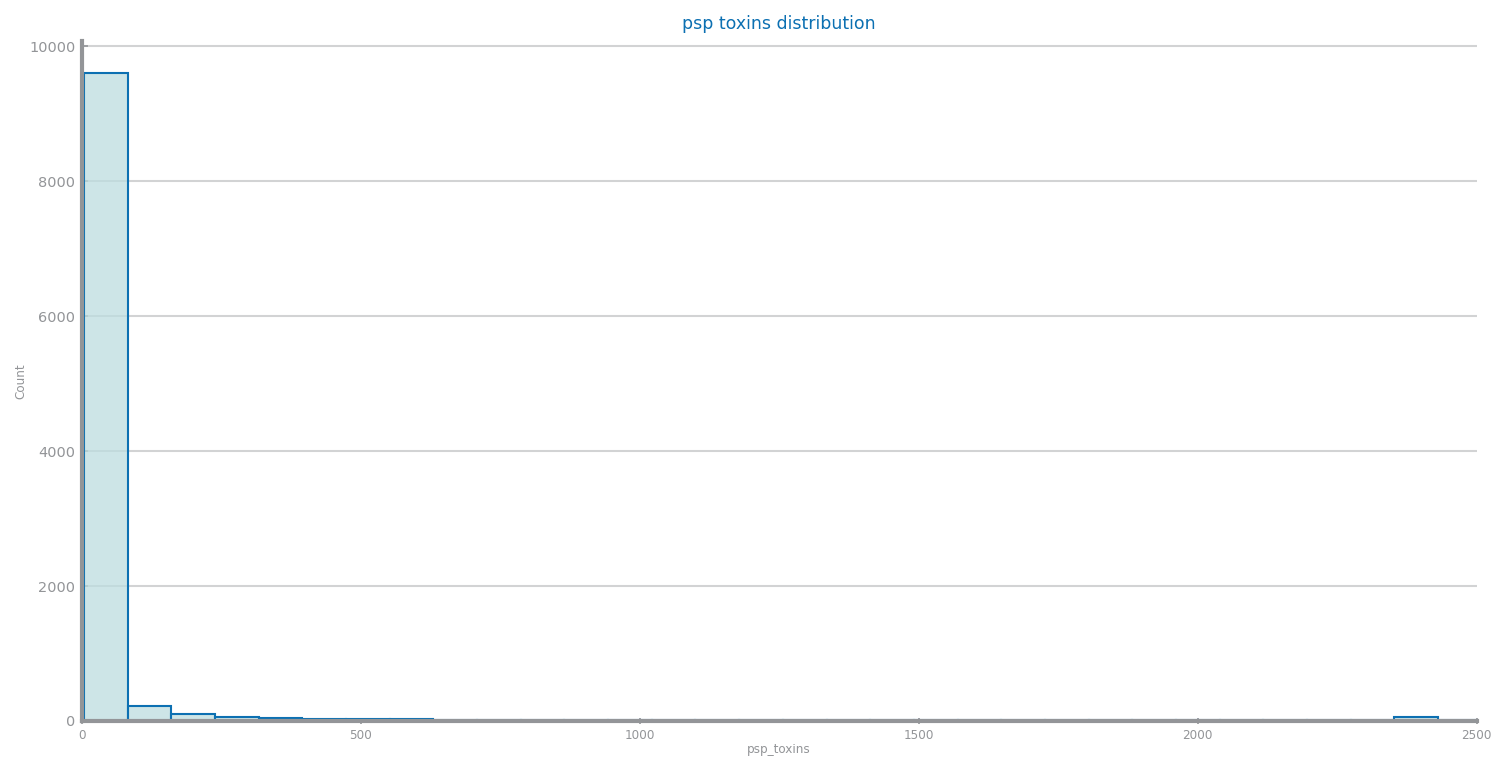

max: 15663.0	min: 4.0	mode: 71.0 x67.71%	mean: 117.47113793439112 +- 342.2066400737281


In [9]:
fig, ax = plt.subplots(1,1,figsize=(12,6))
ax.set_xlim(0,1000)
ax.set_title("dsp toxins distribution")
sns.histplot(data, x="dsp_toxins", bins=100, ax=ax)
plt.show()
print( f"max: {data['dsp_toxins'].max()}\tmin: {data['dsp_toxins'].min()}\tmode: {data['dsp_toxins'].mode()[0]} x{data['dsp_toxins'].value_counts().tolist()[0]/data.shape[0]*100:.2f}%\tmean: {data['dsp_toxins'].mean()} +- {data['dsp_toxins'].std()}")

#########################################################################33
fig, ax = plt.subplots(1,1,figsize=(12,6))
ax.set_xlim(0,10)
ax.set_title("asp toxins distribution")
sns.histplot(data, x="asp_toxins", bins=100, ax=ax)
plt.show()
print( f"max: {data['asp_toxins'].max()}\tmin: {data['asp_toxins'].min()}\tmode: {data['asp_toxins'].mode()[0]} x{data['asp_toxins'].value_counts().tolist()[0]/data.shape[0]*100:.2f}%\tmean: {data['asp_toxins'].mean()} +- {data['asp_toxins'].std()}")

#########################################################################
fig, ax = plt.subplots(1,1,figsize=(12,6))
ax.set_xlim(0,2500)
ax.set_title("psp toxins distribution")
sns.histplot(data, x="psp_toxins", bins=200, ax=ax)
plt.show()
print( f"max: {data['psp_toxins'].max()}\tmin: {data['psp_toxins'].min()}\tmode: {data['psp_toxins'].mode()[0]} x{data['psp_toxins'].value_counts().tolist()[0]/data.shape[0]*100:.2f}%\tmean: {data['psp_toxins'].mean()} +- {data['psp_toxins'].std()}")


Distribution by **toxin** and **species**

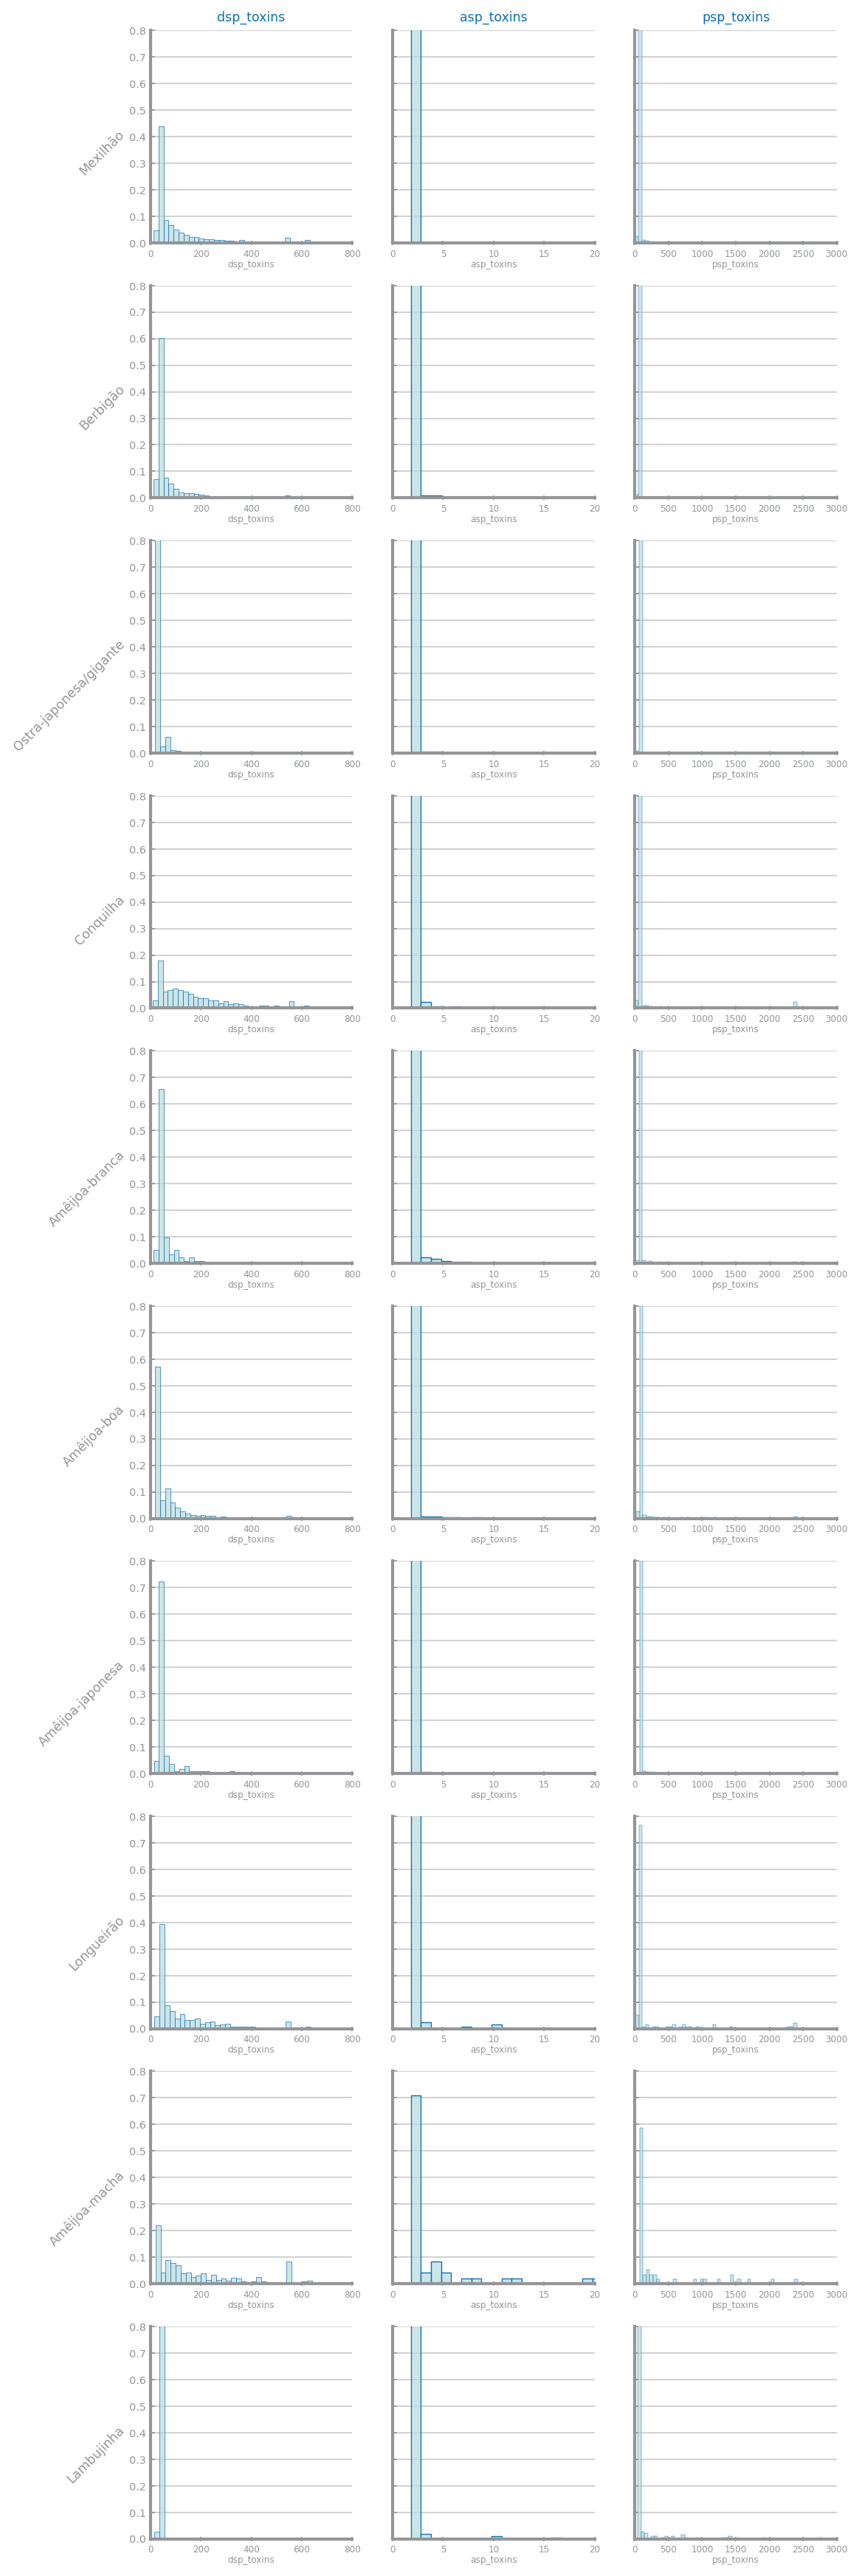

In [24]:
toxins = ["dsp_toxins", "asp_toxins", "psp_toxins"]
toxins_limits = [800, 20, 3000]
toxins_binwidth=[20, 1, 50]
species = data["Species"].value_counts().index.tolist()[:10]

fig, axes = plt.subplots(len(species), len(toxins), figsize=(8,30), sharey=True)

for r in range(len(species)):
    for c in range(len(toxins)):
        axes[r,c].set_xlim(0, toxins_limits[c])
        t = data[ data["Species"]== species[r] ]
        sns.histplot(t, x=toxins[c], binwidth=toxins_binwidth[c], stat="proportion", ax=axes[r,c])

for ax, col in zip(axes[0], toxins):
    ax.set_title(col)
for ax, row in zip(axes[:,0], species):
    ax.set_ylabel(row, rotation=45, ha="right", size='small')
    ax.set_ylim(0, 0.8)

plt.show()

Distribution by **toxin** and **Production Area**

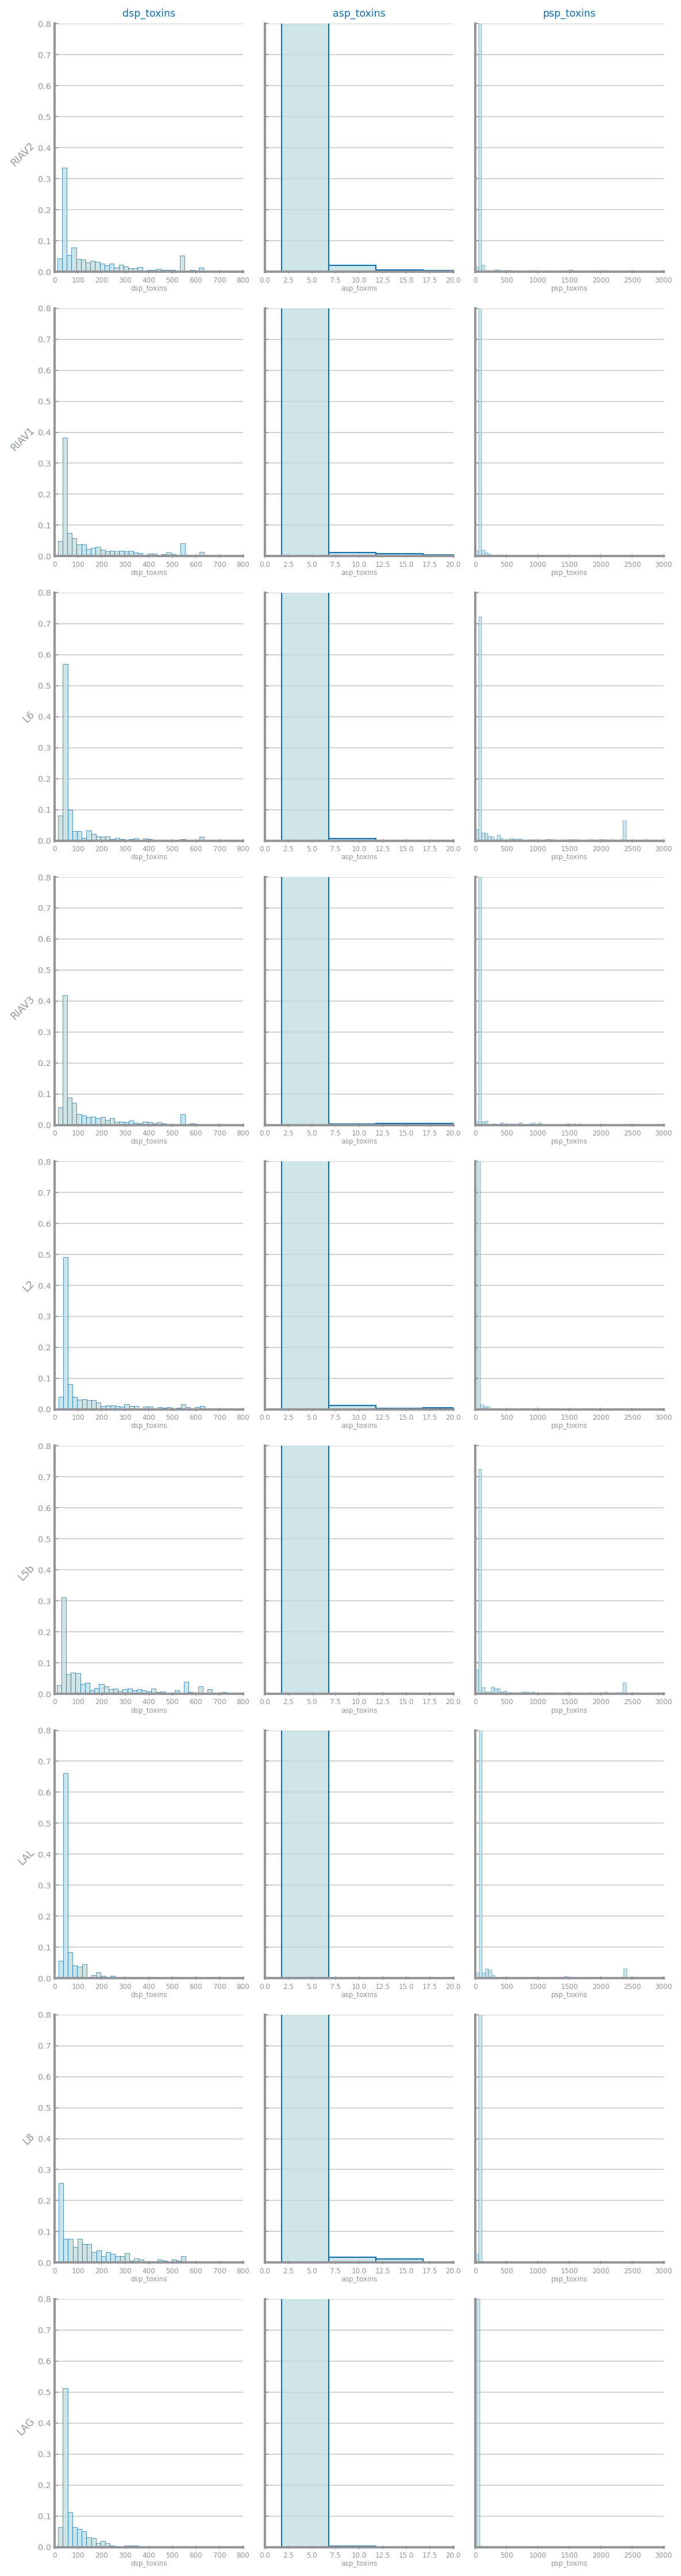

In [25]:
toxins = ["dsp_toxins", "asp_toxins", "psp_toxins"]
toxins_limits = [800, 20, 3000]
toxins_binwidth=[20, 5, 50]
areas = data["Production_Area"].value_counts()[data["Production_Area"].value_counts()>400].index.tolist()
areas = data["Production_Area"].value_counts().index.tolist()[:10]
areas = areas[:2] + areas[3:]

fig, axes = plt.subplots(len(areas), len(toxins), figsize=(8,30), sharey=True)

for r in range(len(areas)):
    for c in range(len(toxins)):
        axes[r,c].set_xlim(0, toxins_limits[c])
        t = data[ data["Production_Area"]== areas[r] ]
        sns.histplot(t, x=toxins[c], binwidth=toxins_binwidth[c], stat="proportion", ax=axes[r,c])

for ax, col in zip(axes[0], toxins):
    ax.set_title(col)
for ax, row in zip(axes[:,0], areas):
    ax.set_ylabel(row, rotation=45, ha="right", size='small')
    ax.set_ylim(0, 0.8)
fig.tight_layout()
plt.show()

### Toxins correlation

<AxesSubplot:>

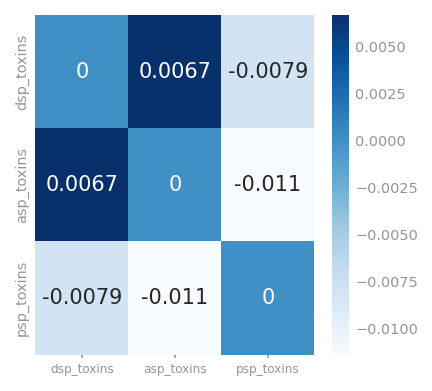

In [26]:
fig = plt.figure(figsize=(3,3))
toxins = ["dsp_toxins", "asp_toxins", "psp_toxins"]
t = data.dropna(subset=toxins)
corrs = []
for i in toxins:
    for j in toxins:
        if i == j :
            corrs.append(0)
        else:
            p, _ = pearsonr(t[i], t[j])
            corrs.append(p)
corrs = np.array(corrs).reshape((len(toxins), len(toxins)))
sns.heatmap(corrs, xticklabels=toxins, yticklabels=toxins, annot=True, cmap='Blues')

Dataset completo

(21, 8)


,Sample,Species,Sample_Point,Production_Area,Date,dsp_toxins,asp_toxins,psp_toxins
762,782,Mexilhão,Armona,L8,2015-05-11,166.0,7.0,47.0
937,973,Mexilhão,Caparica,L5b,2015-06-03,720.0,4.0,533.0
940,981,Conquilha,Fonte da Telha,L5,2015-06-04,871.0,16.0,53.0
953,985,Mexilhão,Porto Brandão,ETJ1,2015-06-08,59.0,3.0,47.0
4965,1811,Berbigão,Sul da Ponte da Barra,RIAV2,2017-02-10,118.0,5.3,84.0
4968,1813,Berbigão,Moacha,RIAV1,2017-02-10,79.0,4.2,107.0
5357,682,Amêijoa-macha,Sul da Ponte da Barra,RIAV2,2017-04-24,260.0,8.5,104.0
6040,1469,Mexilhão,Docapesca,RIAV2,2017-08-14,415.0,18.8,90.0
6042,1470,Berbigão,Canal do Espinheiro,RIAV3,2017-08-14,145.0,19.7,54.0
6043,1471,Berbigão,Moacha,RIAV1,2017-08-14,62.0,17.8,47.0


<AxesSubplot:>

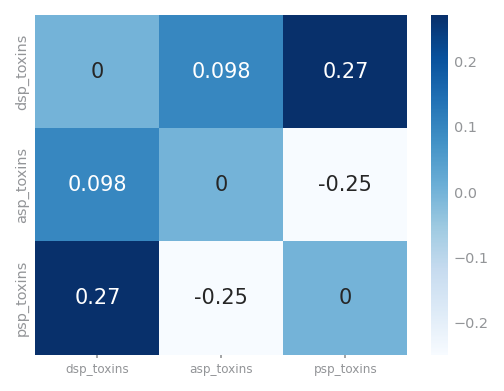

In [27]:
# dsp->36 | asp->1.8 | psp->71
t = data[ (data["asp_toxins"]!=1.8) & (data["psp_toxins"]!=71) & (data["dsp_toxins"]!=36)]
t = t.dropna(subset=toxins)
print(t.shape)
display(t)
corrs = []
for i in toxins:
    for j in toxins:
        if i == j :
            corrs.append(0)
        else:
            p, _ = pearsonr(t[i], t[j])
            corrs.append(p)
corrs = np.array(corrs).reshape((len(toxins), len(toxins)))
sns.heatmap(corrs, xticklabels=toxins, yticklabels=toxins, annot=True, cmap='Blues')

Dataset sem valores default

## Samples variable

In [31]:
for i in data["Sample"]:
    if type(i) != int:
        print(i)

data[data["Sample"].isin(["1503 O", "245 N", "1387 O"])]

245 N
1387 O
1503 O


,Sample,Species,Sample_Point,Production_Area,Date,dsp_toxins,asp_toxins,psp_toxins
2643,245 N,Longueirão,Comporta,L6,2016-02-23,36.0,1.8,71.0
3760,1387 O,Ostra-portuguesa,a Roncão- Casa branca,EMR,2016-08-08,36.0,1.8,71.0
3867,1503 O,Ostra-portuguesa,a Vale da Lama,LAG,2016-08-28,36.0,NaN,NaN


In [32]:
t = data[~(data["Sample"].isin(["1503 O", "245 N", "1387 O"]))]
display(t["Sample"].value_counts())
print("non-unique Samples:", (t["Sample"].value_counts().values>1).sum()) #number of non unique samples

#display(t["Sample"].value_counts().head(20))

702     7
1       6
1536    6
1507    6
1531    6
       ..
2364    1
2363    1
2362    1
2360    1
2334    1
Name: Sample, Length: 2385, dtype: int64

non-unique Samples: 2331


In [33]:
display(data[ data["Sample"]==1 ])
display(data[ data["Sample"]==5 ])
display(data[ data["Sample"]==702 ])

,Sample,Species,Sample_Point,Production_Area,Date,dsp_toxins,asp_toxins,psp_toxins
0,1,Mexilhão,Jangada,LAL,2015-01-05,20.0,1.8,71.0
2385,1,Mexilhão,Jangada,LAL,2016-01-04,36.0,1.8,71.0
4906,1,Mexilhão,Porto Brandão,ETJ1,2017-02-01,36.0,1.8,71.0
7021,1,Amêijoa-japonesa,Carrasqueira,ESD2,2018-01-02,36.0,1.8,71.0
9265,1,Mexilhão,Marchil,FAR1,2019-01-02,36.0,1.8,71.0
11523,1,Berbigão,Canal do Espinheiro,RIAV3,2020-01-02,36.0,1.8,NaN


,Sample,Species,Sample_Point,Production_Area,Date,dsp_toxins,asp_toxins,psp_toxins
14,5,Mexilhão,Fortaleza,OLH2,2015-01-05,40.0,1.8,71.0
2387,5,Ameijola,Comporta,L6,2016-01-05,36.0,1.8,71.0
4903,5,Mexilhão,Docapesca,RIAV2,2017-02-01,51.0,1.8,3001.0
7019,5,Conquilha,Monte Gordo,L9,2018-01-02,77.0,1.8,44.0
9263,5,Amêijoa-branca,Aguda,L2,2019-01-02,36.0,1.8,71.0
11519,5,Amêijoa-boa,Moacha,RIAV1,2020-01-02,36.0,NaN,NaN


,Sample,Species,Sample_Point,Production_Area,Date,dsp_toxins,asp_toxins,psp_toxins
664,702,Mexilhão,Vale da Lama,LAG,2015-04-28,116.0,1.8,71.0
3054,702,Ostra-japonesa/gigante,Garganta,OLH4,2016-05-02,76.0,NaN,NaN
5371,702,Amêijoa-japonesa,Canal do Espinheiro,RIAV3,2017-04-26,154.0,NaN,NaN
7694,702,Berbigão,Morraceira Norte,EMN1,2018-05-08,36.0,1.8,71.0
9987,702,Mexilhão,Jangada,LAL,2019-05-06,36.0,1.8,165.0
9989,702,Mexilhão,Jangada,LAL,2019-05-06,36.0,1.8,165.0
12201,702,Amêijoa-branca,Torreira,L3,2020-04-28,36.0,1.8,71.0


In [34]:
t = data[~(data["Sample"].isin(["1503 O", "245 N", "1387 O"])) & (data["Date"].dt.year == 2016)]
display(t["Sample"].value_counts())
print("non-unique Samples:", (t["Sample"].value_counts().values>1).sum()) #number of non unique samples

62      1
1599    1
1554    1
1553    1
1552    1
       ..
778     1
764     1
777     1
781     1
2320    1
Name: Sample, Length: 2312, dtype: int64

non-unique Samples: 0


In [35]:
t = data[~(data["Sample"].isin(["1503 O", "245 N", "1387 O"])) & (data["Date"].dt.year == 2016)]
t.sort_values("Sample").head(20)

,Sample,Species,Sample_Point,Production_Area,Date,dsp_toxins,asp_toxins,psp_toxins
2385,1,Mexilhão,Jangada,LAL,2016-01-04,36.0,1.8,71.0
2388,2,Amêijoa-branca,Comporta,L6,2016-01-05,36.0,1.8,71.0
2392,3,Longueirão,Comporta,L6,2016-01-05,36.0,1.8,71.0
2391,4,Mexilhão,Porto de Mós,L7c2,2016-01-05,44.0,1.8,71.0
2387,5,Ameijola,Comporta,L6,2016-01-05,36.0,1.8,71.0
2395,6,Mexilhão,Frente à Escola de Vela,LOB,2016-01-06,36.0,1.8,71.0
2393,7,Berbigão,L.Óbidos - Greijau,LOB,2016-01-06,36.0,1.8,71.0
2394,8,Mexilhão,Porto Brandão,ETJ1,2016-01-06,31.0,1.8,71.0
2396,9,Mexilhão,Caparica,L5b,2016-01-06,77.0,1.8,71.0
2397,10,Mexilhão,Offshore,L7c1,2016-01-06,30.0,1.8,71.0


## Species Analysis

In [21]:
data_ts = pd.read_excel(data_dir + 'biotoxins_preprocessed.xlsx', index_col='Date', parse_dates=True,
                             engine="openpyxl").drop(columns=["Sample", "Sample_Point"])
data_ts.head()

,Species,Production_Area,dsp_toxins,asp_toxins,psp_toxins
Date,,,,,
2015-01-05,Mexilhão,LAL,20.0,1.8,71.0
2015-01-05,Berbigão,RIAV3,36.0,1.8,71.0
2015-01-05,Berbigão,RIAV2,26.0,1.8,71.0
2015-01-05,Berbigão,RIAV1,36.0,1.8,71.0
2015-01-05,Amêijoa-branca,L3,36.0,1.8,71.0


In [23]:
print(data_ts["Species"].unique())
print(len(data_ts["Species"].unique()))

['Mexilhão' 'Berbigão' 'Amêijoa-branca' 'Conquilha' 'Pé-de-burrinho'
 'Amêijoa-boa' 'Lambujinha' 'Amêijoa-japonesa' 'Longueirão' 'Ameijola'
 'A. asiática' 'Ostra' 'Amêijoa-macha' 'Amêijoa-relógio' 'Telina'
 'Castanhola' 'Amêijoa' 'Ostra-japonesa/gigante' 'Ostra-portuguesa'
 'Amêijoa-cão' 'Ostra-plana' 'Lapa' 'Pé-burrinho']
23


In [22]:
data_ts["Species"].value_counts(normalize=True)

Mexilhão                  0.442088
Berbigão                  0.149209
Ostra-japonesa/gigante    0.065019
Conquilha                 0.061521
Amêijoa-branca            0.057439
Amêijoa-boa               0.056710
Amêijoa-japonesa          0.040746
Longueirão                0.040382
Amêijoa-macha             0.026533
Lambujinha                0.016619
Pé-de-burrinho            0.010934
Ostra                     0.009330
Ostra-portuguesa          0.005686
Ameijola                  0.005613
Castanhola                0.004082
Amêijoa-cão               0.002697
A. asiática               0.002624
Amêijoa-relógio           0.001385
Ostra-plana               0.000729
Telina                    0.000364
Amêijoa                   0.000146
Lapa                      0.000073
Pé-burrinho               0.000073
Name: Species, dtype: float64

# phytoplankton preprocessed

## Overall

In [10]:
data_p = pd.read_excel(data_dir + 'phytoplankton_preprocessed.xlsx', engine="openpyxl")
data_p

,Sample,Date,Production_Area,asp_phyto,dsp_phyto,psp_phyto
0,1809.0,2014-10-31,L6,20.0,20.0,20.0
1,1785.0,2014-11-03,LAL,20.0,20.0,20.0
2,1820.0,2014-11-03,RIAV4,20.0,20.0,20.0
3,1821.0,2014-11-03,L3,20.0,20.0,200.0
4,1823.0,2014-11-03,RIAV2,20.0,20.0,20.0
...,...,...,...,...,...,...
12216,1612.0,2020-12-29,L1,20.0,20.0,20.0
12217,1614.0,2020-12-29,POR2,440.0,40.0,20.0
12218,1615.0,2020-12-29,LAG,4760.0,20.0,20.0
12219,1616.0,2020-12-30,FAR2,2440.0,20.0,20.0


**sem localidade, apenas Production Area**  
**sem Species**

**Not preprocesed**

In [11]:
t_p = pd.read_excel(data_dir + 'phytoplankton.xlsx', engine="openpyxl")
t_p

,Sample,Date,Production_Area,ASP,DSP,PSP
0,1785.0,2014-11-03,LAL,0,0,0
1,1786.0,2014-11-04,L5,0,0,0
2,1787.0,2014-11-03,ETJ,0,0,0
3,1788.0,2014-11-03,L9,62524,40,200
4,1789.0,2014-11-03,L8,14778,80,0
...,...,...,...,...,...,...
12216,1613.0,2020-12-28,L7c1,5840,20,nd
12217,1614.0,2020-12-29,POR2,440,40,nd
12218,1615.0,2020-12-29,LAG,4760,<LD,nd
12219,1616.0,2020-12-30,FAR2,2440,<LD,nd


In [12]:
table = []
for c in data_p.columns:
    table.append([c, data_p[c].isna().sum(), round(data_p[c].isna().sum()/data_p.shape[0],3)])
    #print(f"{c} - {data_p[c].isna().sum()} - {data_p[c].isna().sum()/data_p.shape[0]:.3f}")
print(tabulate(table, headers=["Var", "Nº NaNs", "% NaNs"]))

Var                Nº NaNs    % NaNs
---------------  ---------  --------
Sample                   1         0
Date                     0         0
Production_Area          0         0
asp_phyto                4         0
dsp_phyto                4         0
psp_phyto                3         0


In [13]:
print(data_p["Production_Area"].value_counts())
print("-"*30)
print(f'{len(data_p["Production_Area"].unique())} unique production areas')
print("-"*30)
print(f'{data_p["Production_Area"].isna().sum()} NaN sample points')
print("-"*30)
print( f'in phytoplankton and not in biotoxin: {set(data_p["Production_Area"].unique()) - set(data["Production_Area"].unique())}')
print( f'in biotoxin and not in phytoplankton: {set(data["Production_Area"].unique()) - set(data_p["Production_Area"].unique())}')

L1          624
RIAV1       569
L6          568
ESD1        526
L2          519
L3          485
L5          442
ETJ1        376
L8          374
L7c         342
RIAV3       323
RIAV2       312
TAV         309
L9          309
LAL         308
LOB         308
FUZ         307
RIAV4       306
OLH2        302
LAG         298
L7a         297
OLH1        288
VT          282
FAR1        282
POR2        279
ELM         253
FAR2        239
OLH3        238
OLH5        232
EMN2        223
L5b         207
EMN1        183
ESD2        180
L5a         154
EMI         147
L7c2        135
L4          119
POR3        117
EMR         109
L7c1        104
L7b          97
RIAV1/L3     55
OLH4         53
GUA          39
LAG1          2
Name: Production_Area, dtype: int64
------------------------------
45 unique production areas
------------------------------
0 NaN sample points
------------------------------
in phytoplankton and not in biotoxin: {'LAG1', 'RIAV1/L3'}
in biotoxin and not in phytoplankton: {'ETJ2'

Discrepância a nível de áreas que existem num e não no outro

## Date Analysis

In [31]:
print(data_p["Date"].min())
print(data_p["Date"].max())

2014-10-31 00:00:00
2020-12-30 00:00:00


In [40]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    display(data_p[data_p["Production_Area"]=="L1"].sort_values("Date").head(100))

,Sample,Date,Production_Area,asp_phyto,dsp_phyto,psp_phyto
8,1798.0,2014-11-03,L1,20.0,20.0,400.0
30,1812.0,2014-11-04,L1,20.0,20.0,20.0
83,1859.0,2014-11-11,L1,20.0,20.0,20.0
85,1873.0,2014-11-12,L1,20.0,20.0,20.0
99,1911.0,2014-11-17,L1,20.0,20.0,20.0
125,1907.0,2014-11-18,L1,20.0,20.0,20.0
133,1908.0,2014-11-18,L1,20.0,20.0,40.0
140,1958.0,2014-11-24,L1,20.0,20.0,20.0
167,1959.0,2014-11-25,L1,20.0,20.0,20.0
190,1992.0,2014-12-01,L1,20.0,20.0,20.0


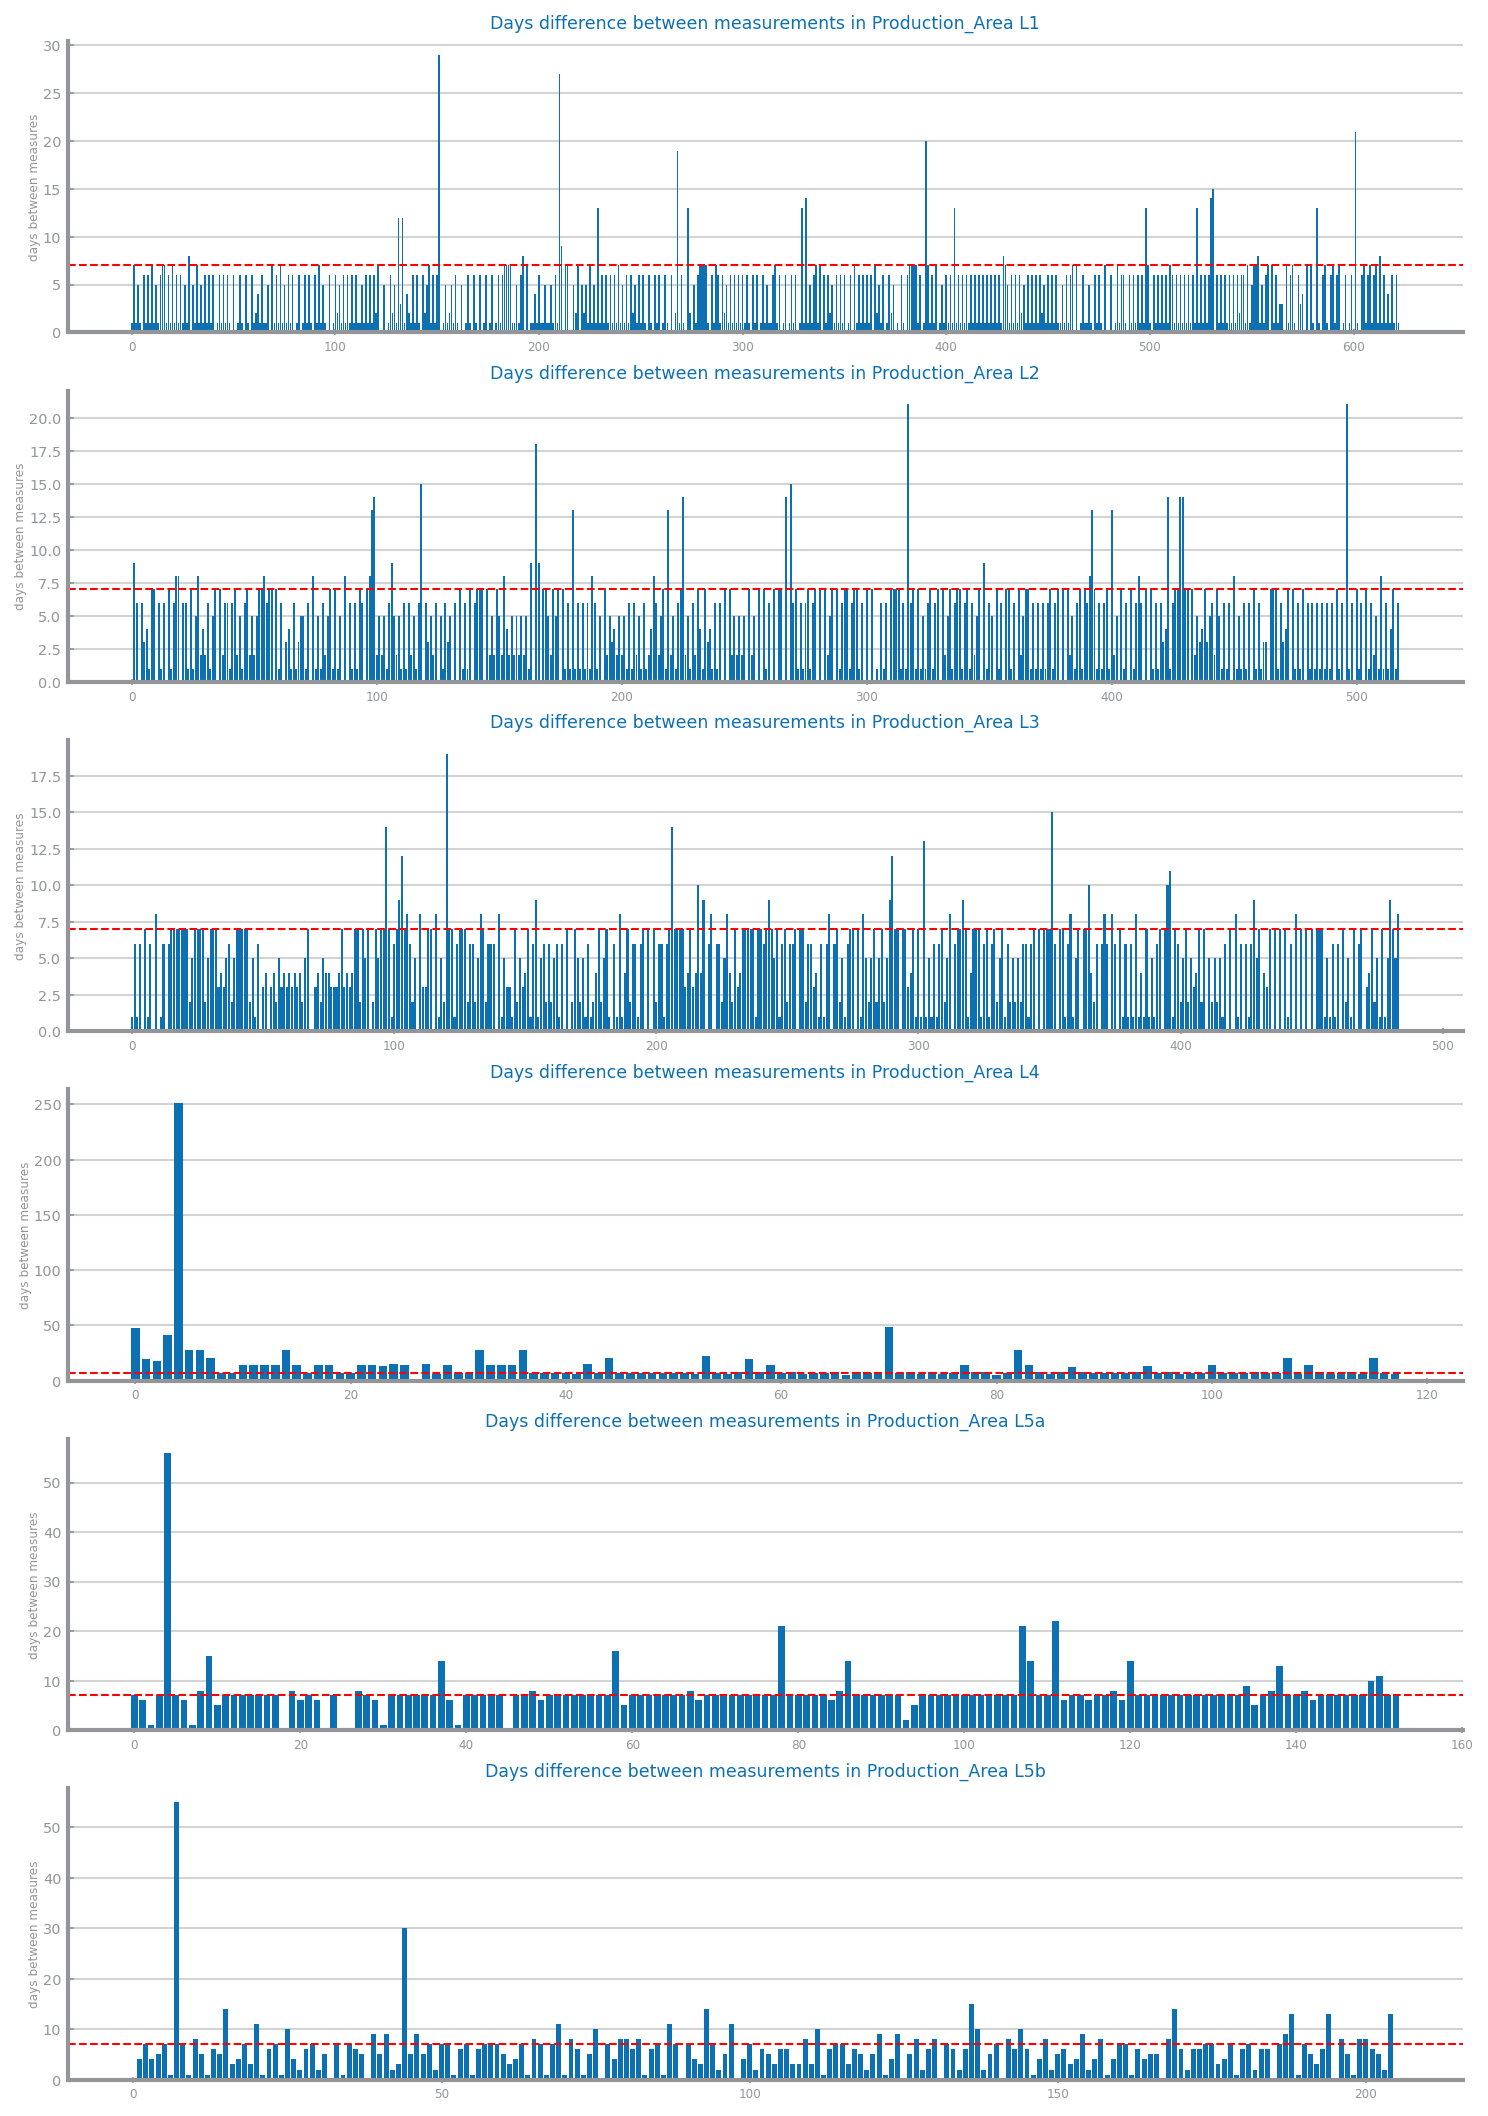

In [41]:
location_type = ["Production_Area"]*6 #Production_Area or Sample_Point
location = ["L1", "L2" ,"L3", "L4", "L5a", "L5b"]

def plot_differences(data, location_type, location, ax):

    ameijoa = data[ (data[location_type] == location) ]

    days = []
    dates = ameijoa["Date"].tolist()
    for i in range(1, len(dates)):
        diff = dates[i] - dates[i-1]
        days.append(diff.days)

    ax.bar(range(len(days)), days)
    ax.axhline(7, linestyle="--", color="r", linewidth=1)
    ax.set_ylabel("days between measures")
    ax.set_title(f"Days difference between measurements in {location_type} {location}")

    
fig, ax = plt.subplots(6,1,figsize=(12,18))
ax = ax.flatten()


for i in range(len(ax)):
    plot_differences(data_p, location_type[i], location[i], ax[i])
    
plt.show()

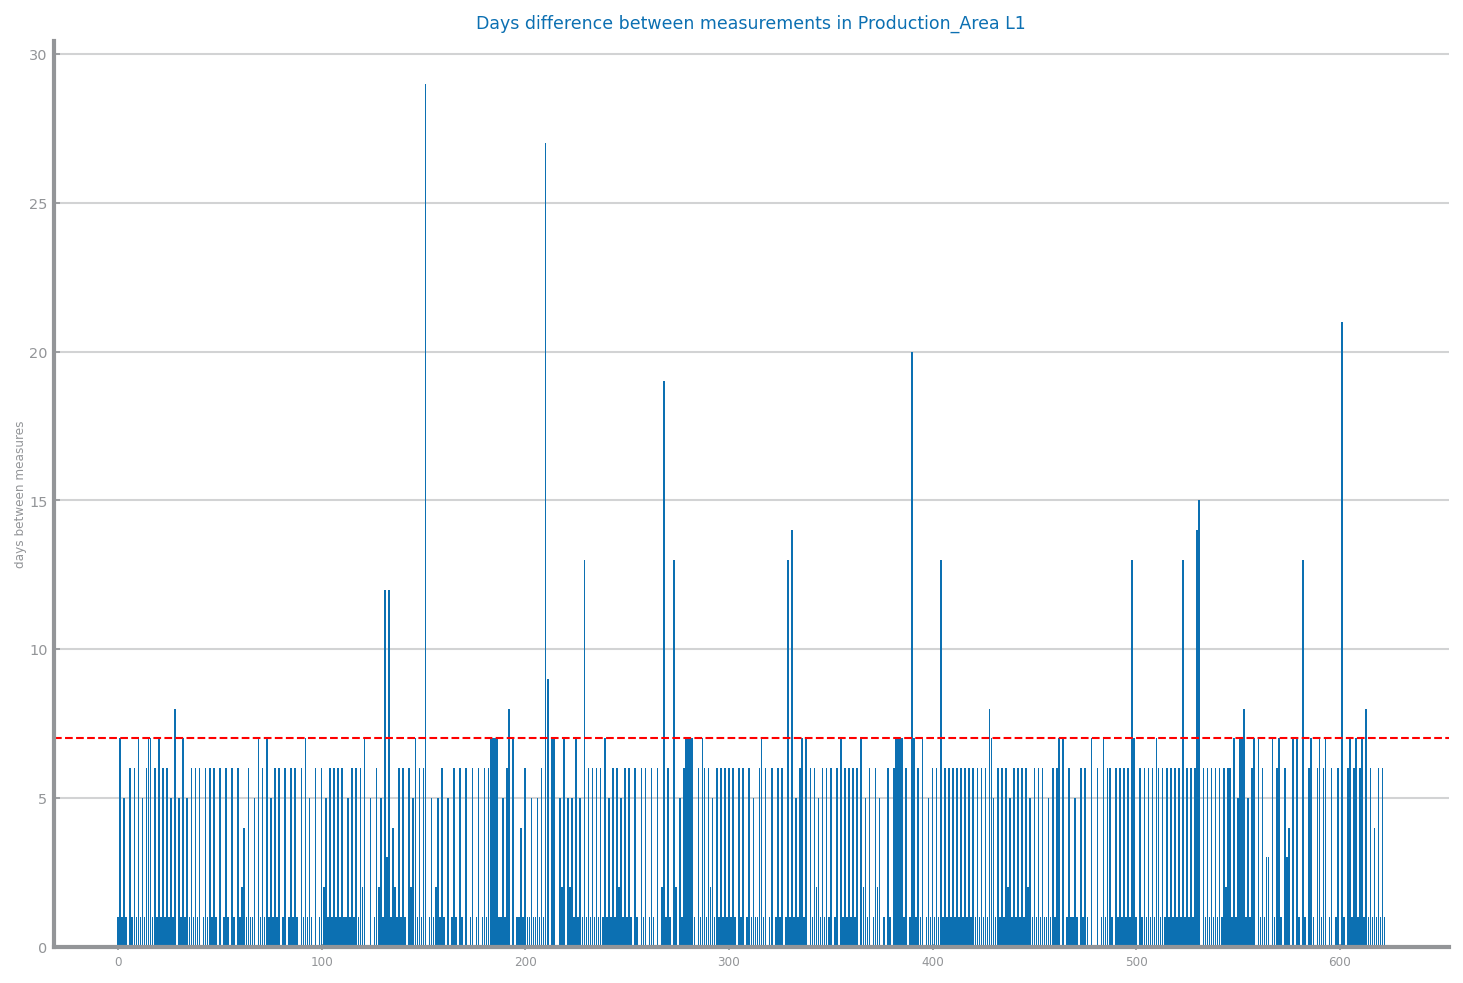

In [42]:
location_type = "Production_Area" #Production_Area or Sample_Point
location = "L1"

fig, ax = plt.subplots(1,1,figsize=(12,8))

plot_differences(data_p, location_type, location, ax)
    
plt.show()

## Production Area

In [32]:
print(data["Production_Area"].unique(), "\n")
print(len(data["Production_Area"].unique()), "\n")
print(len( data[data["Production_Area"] == "L7c"] ), "\n")

['LAL' 'RIAV3' 'RIAV2' 'RIAV1' 'L3' 'RIAV4' 'L2' 'L9' 'FAR2' 'L8' 'FAR1'
 'OLH2' 'VT' 'POR2' 'LAG' 'OLH3' 'OLH4' 'L7a' 'L1' 'FUZ' 'OLH5' 'EMN2'
 'LOB' 'L7c2' 'L7c1' 'L5a' 'ESD2' 'L6' 'ESD1' 'OLH1' 'L5b' 'TAV' 'ETJ1'
 'EMR' 'EMI' 'ELM' 'L7c' 'EMN1' 'L5' 'L4' 'POR3' 'L7b' 'GUA' 'ETJ2'] 

44 

26 



In [33]:
data["Production_Area"].value_counts()

RIAV2    933
RIAV1    930
LOB      669
L6       619
RIAV3    612
L2       552
L5b      432
LAL      430
L8       426
LAG      401
ETJ1     399
TAV      377
OLH2     377
L9       352
RIAV4    351
L3       331
OLH4     330
OLH5     320
FUZ      311
POR2     307
L7c2     305
L1       300
L7c1     295
FAR1     290
FAR2     287
OLH1     250
OLH3     249
ESD2     238
VT       221
L5a      178
ELM      177
GUA      163
POR3     162
ESD1     161
L7a      159
EMN2     157
EMR      150
L4       145
EMN1     123
L7b      121
L5        58
EMI       36
L7c       26
ETJ2       9
Name: Production_Area, dtype: int64

## Toxins

### Overall

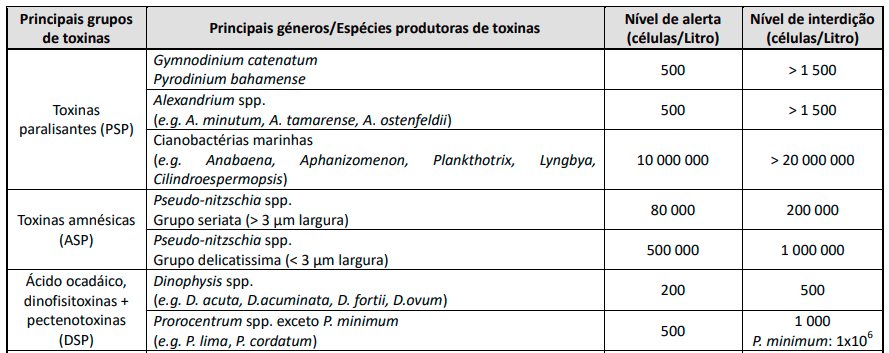

In [43]:
display(Image(filename="images/limit_phyto.png"))

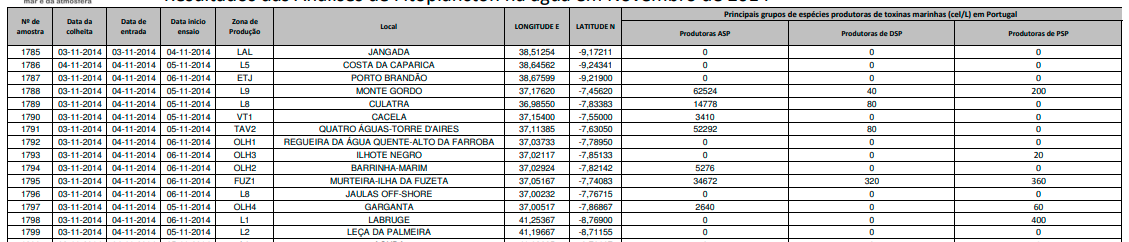

,Sample,Date,Production_Area,asp_phyto,dsp_phyto,psp_phyto
1,1785.0,2014-11-03,LAL,20.0,20.0,20.0
14,1787.0,2014-11-03,ETJ1,20.0,20.0,20.0
15,1788.0,2014-11-03,L9,62524.0,40.0,200.0
16,1789.0,2014-11-03,L8,14778.0,80.0,20.0
19,1790.0,2014-11-03,VT,3410.0,20.0,20.0
18,1791.0,2014-11-03,TAV,52292.0,80.0,20.0
20,1792.0,2014-11-03,OLH1,20.0,20.0,20.0
21,1793.0,2014-11-03,OLH3,20.0,20.0,20.0
12,1794.0,2014-11-03,OLH2,5276.0,20.0,20.0
17,1795.0,2014-11-03,FUZ,34672.0,320.0,360.0


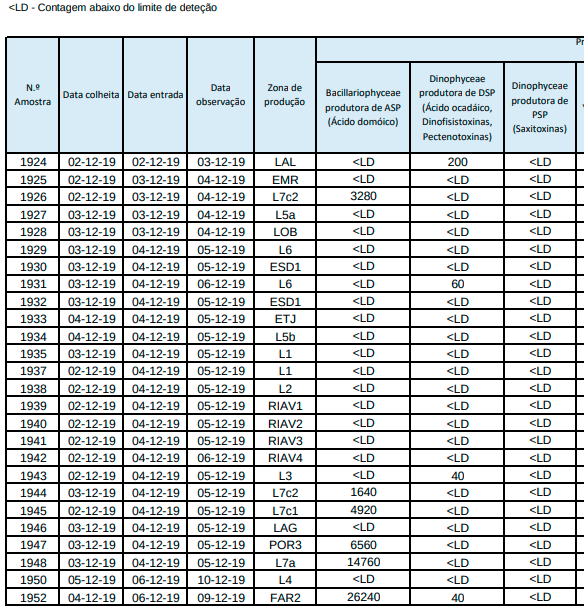

,Sample,Date,Production_Area,asp_phyto,dsp_phyto,psp_phyto
10514,1924.0,2019-12-02,LAL,20.0,200.0,20.0
10515,1925.0,2019-12-02,EMR,20.0,20.0,20.0
10516,1926.0,2019-12-02,L7c2,3280.0,20.0,20.0
10522,1937.0,2019-12-02,L1,20.0,20.0,20.0
10523,1938.0,2019-12-02,L2,20.0,20.0,20.0
10524,1939.0,2019-12-02,RIAV1,20.0,20.0,20.0
10521,1940.0,2019-12-02,RIAV2,20.0,20.0,20.0
10520,1941.0,2019-12-02,RIAV3,20.0,20.0,20.0
10519,1942.0,2019-12-02,RIAV4,20.0,20.0,20.0
10518,1943.0,2019-12-02,L3,20.0,40.0,20.0


In [44]:
display(Image(filename="images/phyto_data1.png"))
display(data_p[ (data_p["Date"].dt.year==2014) & (data_p["Date"].dt.month==11)].sort_values(["Date","Sample"]).head(10))

display(Image(filename="images/phyto_data2.png"))
display(data_p[ (data_p["Date"].dt.year==2019) & (data_p["Date"].dt.month==12)].sort_values(["Date","Sample"]).head(10))


Logo:  

|   | DSP | ASP | PSP |
|:-:|:---:|-----|-----|
| 0/<LD |  20 | 20  | 20  |


### NaNs in toxins

In [58]:
toxins = data_p[["dsp_phyto", "asp_phyto", "psp_phyto"]]

with warnings.catch_warnings(record=True):
    toxins[toxins.notna()] = "Not NaN"
    toxins[toxins.isna()] = "NaN"

#display(toxins)

display(pd.crosstab(toxins["dsp_phyto"], [toxins["asp_phyto"], toxins["psp_phyto"]]))
display(pd.crosstab(toxins["dsp_phyto"], [toxins["asp_phyto"], toxins["psp_phyto"]], normalize='all').round(decimals=3))


asp_phyto NaN         Not NaN
psp_phyto NaN Not NaN Not NaN
dsp_phyto                    
NaN         3       1       0
Not NaN     0       0   12217

asp_phyto  NaN         Not NaN
psp_phyto  NaN Not NaN Not NaN
dsp_phyto                     
NaN        0.0     0.0     0.0
Not NaN    0.0     0.0     1.0

### Toxins distribution

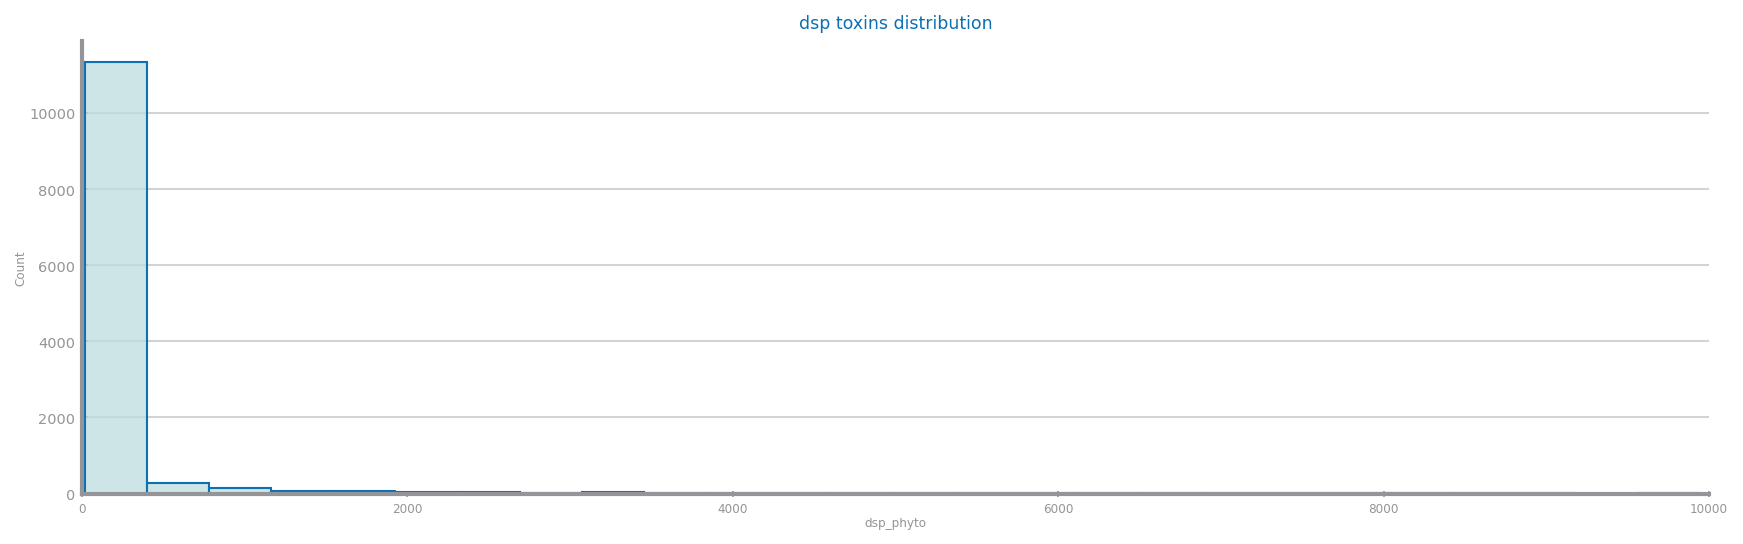

max: 1907840.0	min: 20.0	mode: 20.0 ->67.99%	mean: 1772.268969468773 +- 39746.462180126226


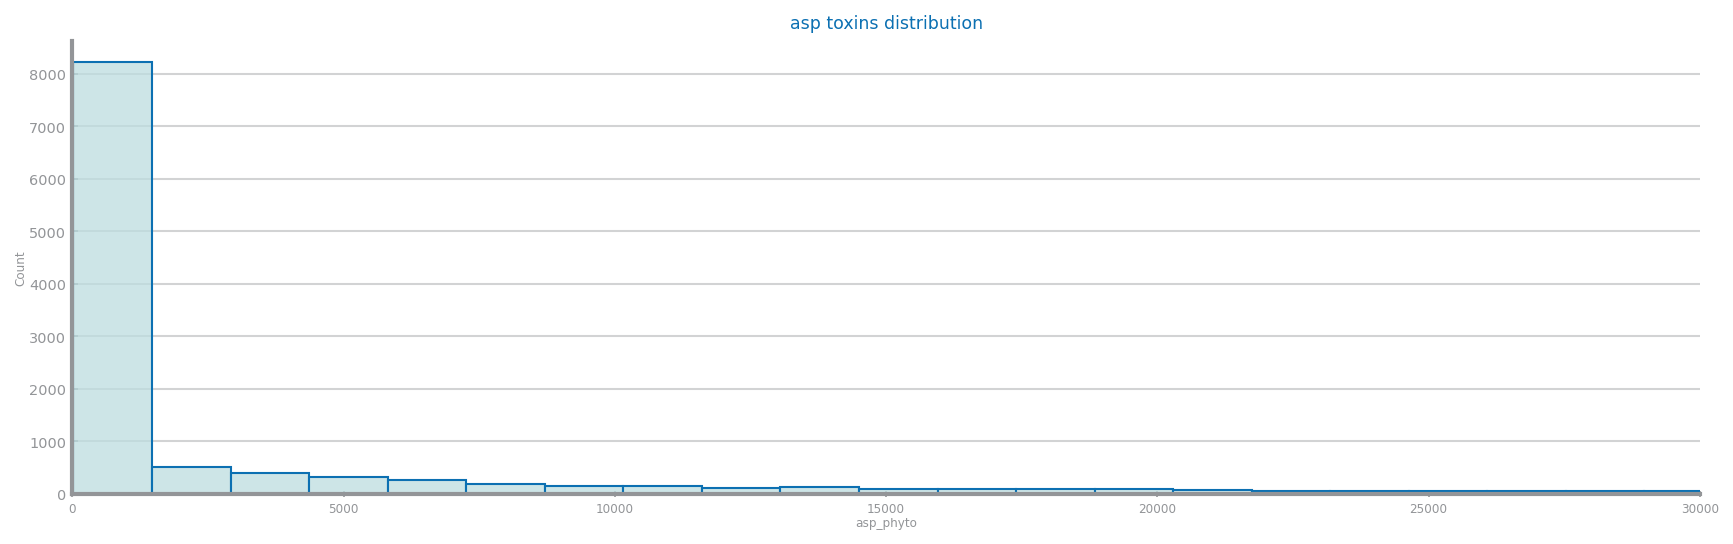

max: 7240000.0	min: 20.0	mode: 20.0 x62.81%	mean: 15346.574609151183 +- 99335.05212533321


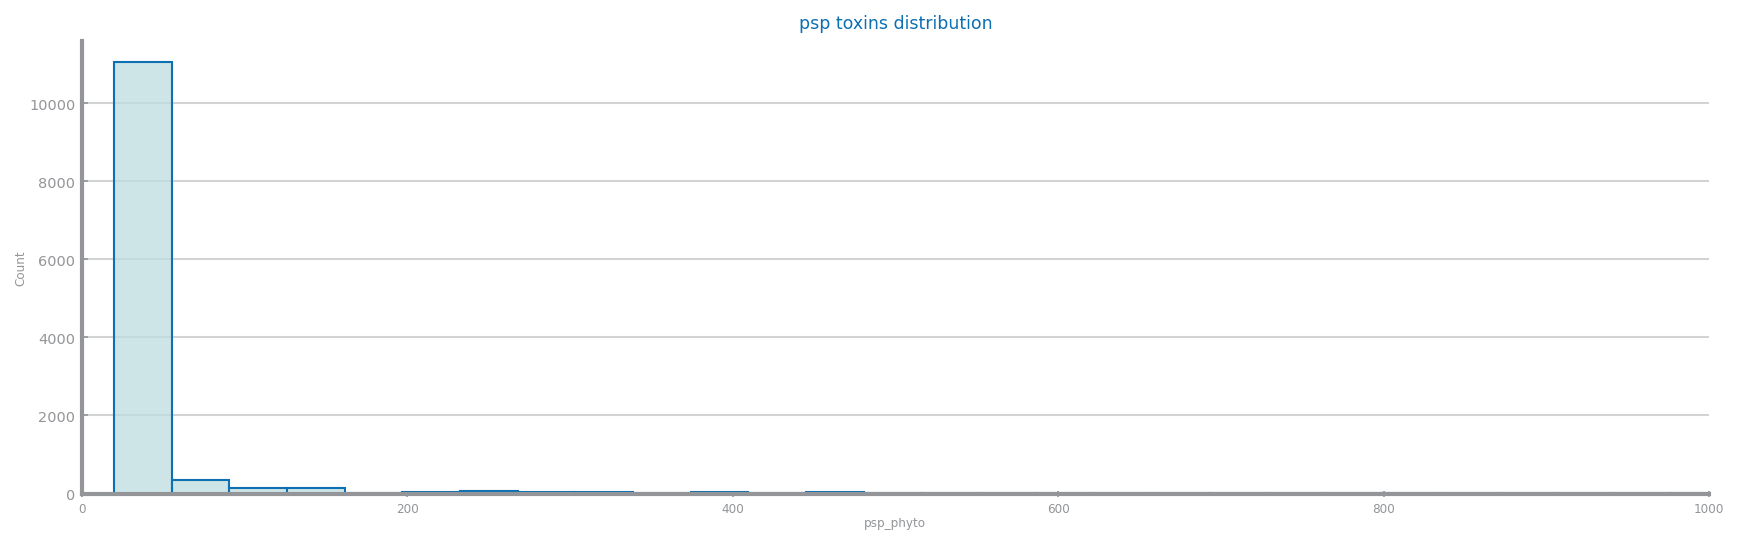

max: 35440.0	min: 20.0	mode: 20.0 x87.28%	mean: 85.75486986413489 +- 757.1355311693213


In [27]:
fig, ax = plt.subplots(1,1,figsize=(14,4))
ax.set_xlim(0,10000)
ax.set_title("dsp toxins distribution")
sns.histplot(data_p, x="dsp_phyto", bins=5000, ax=ax)
plt.show()
print( f"max: {data_p['dsp_phyto'].max()}\tmin: {data_p['dsp_phyto'].min()}\tmode: {data_p['dsp_phyto'].mode()[0]} ->{data_p['dsp_phyto'].value_counts().tolist()[0]/data_p.shape[0]*100:.2f}%\tmean: {data_p['dsp_phyto'].mean()} +- {data_p['dsp_phyto'].std()}")

#########################################################################33

fig, ax = plt.subplots(1,1,figsize=(14,4))
ax.set_xlim(0,30000)
ax.set_title("asp toxins distribution")
sns.histplot(data_p, x="asp_phyto", bins=5000, ax=ax)
plt.show()
print( f"max: {data_p['asp_phyto'].max()}\tmin: {data_p['asp_phyto'].min()}\tmode: {data_p['asp_phyto'].mode()[0]} x{data_p['asp_phyto'].value_counts().tolist()[0]/data_p.shape[0]*100:.2f}%\tmean: {data_p['asp_phyto'].mean()} +- {data_p['asp_phyto'].std()}")

#########################################################################
fig, ax = plt.subplots(1,1,figsize=(14,4))
ax.set_xlim(0,1000)
ax.set_title("psp toxins distribution")
sns.histplot(data_p, x="psp_phyto", bins=1000, ax=ax)
plt.show()
print( f"max: {data_p['psp_phyto'].max()}\tmin: {data_p['psp_phyto'].min()}\tmode: {data_p['psp_phyto'].mode()[0]} x{data_p['psp_phyto'].value_counts().tolist()[0]/data_p.shape[0]*100:.2f}%\tmean: {data_p['psp_phyto'].mean()} +- {data_p['psp_phyto'].std()}")


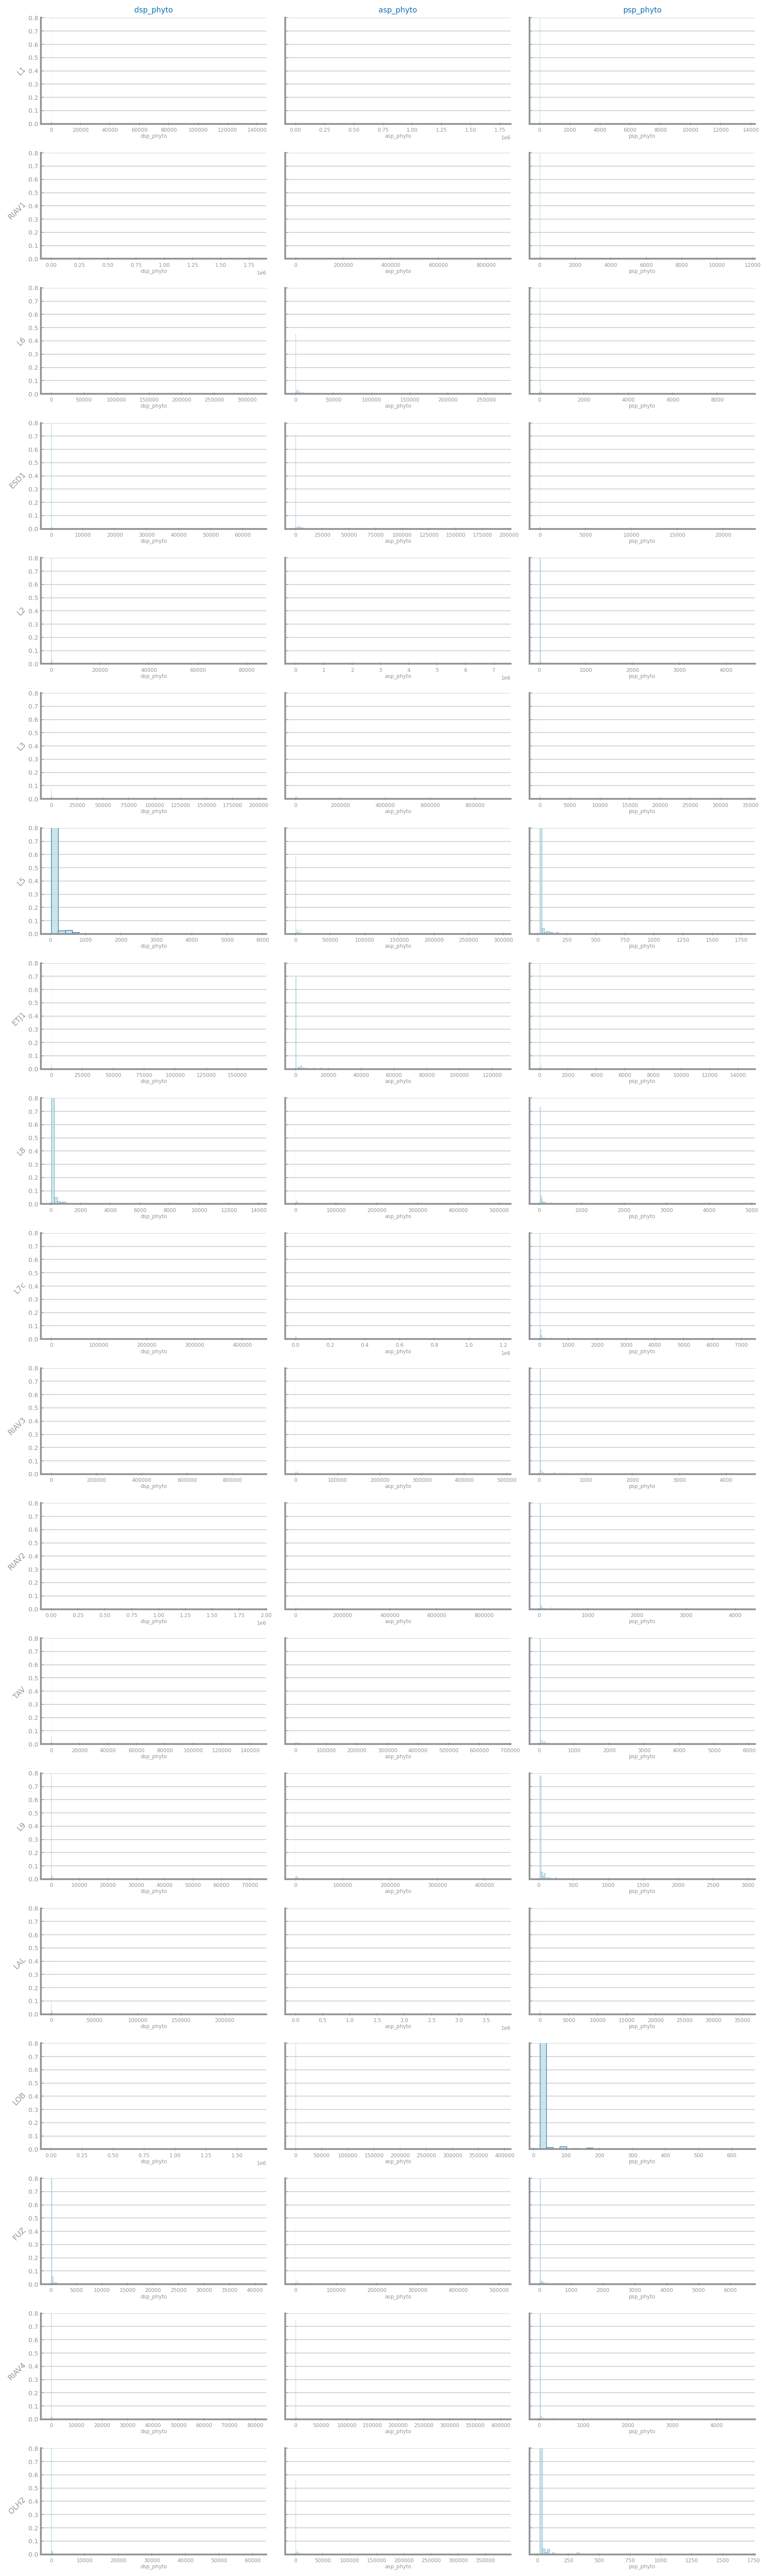

In [47]:
toxins = ["dsp_phyto", "asp_phyto", "psp_phyto"]
toxins_limits = [10000, 30000, 1000]
toxins_binwidth = [200, 500, 20]
areas = data_p["Production_Area"].value_counts()[data_p["Production_Area"].value_counts()>300].index.tolist()
areas = data_p["Production_Area"].value_counts()[data_p["Production_Area"].value_counts()>300].index.tolist()

fig, axes = plt.subplots(len(areas), len(toxins), figsize=(12,40), sharey=True)

for r in range(len(areas)):
    for c in range(len(toxins)):
        #axes[r,c].set_xlim(0, toxins_limits[c])
        t = data_p[ data_p["Production_Area"]== areas[r] ]
        sns.histplot(t, x=toxins[c], binwidth=toxins_binwidth[c], stat="proportion", ax=axes[r,c])

for ax, col in zip(axes[0], toxins):
    ax.set_title(col)
for ax, row in zip(axes[:,0], areas):
    ax.set_ylabel(row, rotation=45, ha="right", size='small')
    ax.set_ylim(0, 0.8)
fig.tight_layout()
plt.show()

### Toxins correlation

<AxesSubplot:>

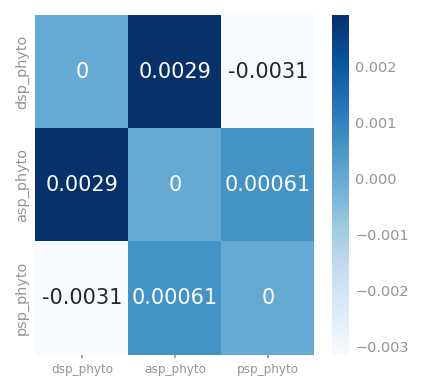

In [48]:
fig = plt.figure(figsize=(3,3))
toxins = ["dsp_phyto", "asp_phyto", "psp_phyto"]
t = data_p.dropna(subset=toxins)
corrs = []
for i in toxins:
    for j in toxins:
        if i == j :
            corrs.append(0)
        else:
            p, _ = pearsonr(t[i], t[j])
            corrs.append(p)
corrs = np.array(corrs).reshape((len(toxins), len(toxins)))
sns.heatmap(corrs, xticklabels=toxins, yticklabels=toxins, annot=True, cmap='Blues')

(383, 6)


<AxesSubplot:>

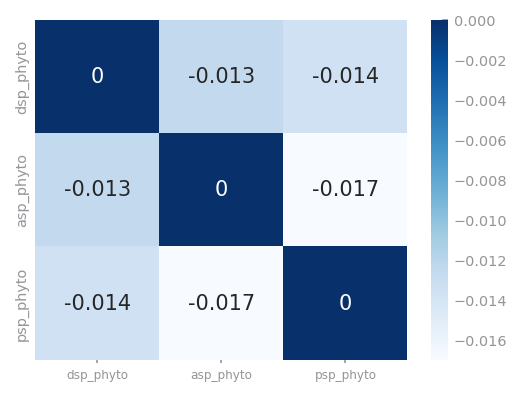

In [49]:
# dsp->36 | asp->1.8 | psp->71
t = data_p[ (data_p["asp_phyto"]!=20) & (data_p["psp_phyto"]!=20) & (data_p["dsp_phyto"]!=20)]
t = t.dropna(subset=toxins)
print(t.shape)
corrs = []
for i in toxins:
    for j in toxins:
        if i == j :
            corrs.append(0)
        else:
            p, _ = pearsonr(t[i], t[j])
            corrs.append(p)
corrs = np.array(corrs).reshape((len(toxins), len(toxins)))
sns.heatmap(corrs, xticklabels=toxins, yticklabels=toxins, annot=True, cmap='Blues')

## Samples

In [50]:
for i in data_p["Sample"]:
    if type(i) != float:
        print(i)

display(t["Sample"].value_counts())

print("non-unique Samples:", (t["Sample"].value_counts().values>1).sum()) #number of non unique samples

1568.0    4
1683.0    3
1567.0    3
1135.0    3
740.0     3
         ..
324.0     1
325.0     1
133.0     1
89.0      1
823.0     1
Name: Sample, Length: 344, dtype: int64

non-unique Samples: 32


# IPMA data folder

In [51]:
sorted(os.listdir("../data/ipma_data/"))

['ipma_ELM_Montante da Ponte Eiffel.xlsx',
 'ipma_EMN1_Morraceira Norte.xlsx',
 'ipma_EMN2_Morraceira Sul.xlsx',
 'ipma_EMR_Jusante da Ponte.xlsx',
 'ipma_EMR_Troviscais.xlsx',
 'ipma_ESD1_Canal da Vaia.xlsx',
 'ipma_ESD1_Faralh╞o.xlsx',
 'ipma_ESD1_Mitrena.xlsx',
 'ipma_ESD2_Abul.xlsx',
 'ipma_ESD3_Palma.xlsx',
 'ipma_ESD4_Carrasqueira.xlsx',
 'ipma_ETJ1_Alcochete.xlsx',
 'ipma_ETJ1_Baliza de Ferro.xlsx',
 'ipma_ETJ1_Cacilhas.xlsx',
 'ipma_ETJ1_Samouco.xlsx',
 'ipma_ETJ1_Trafaria.xlsx',
 'ipma_FAR1_Marchil.xlsx',
 'ipma_FAR2_Largura.xlsx',
 'ipma_FUZ_Fuzeta.xlsx',
 'ipma_GUA_Castro Marim.xlsx',
 'ipma_L1_CarreЗo.xlsx',
 'ipma_L1_Labruge.xlsx',
 'ipma_L2_Aguda.xlsx',
 'ipma_L2_LeЗa da Palmeira.xlsx',
 'ipma_L3_Torreira.xlsx',
 'ipma_L4_Leirosa.xlsx',
 'ipma_L4_Pedrвg╞o.xlsx',
 'ipma_L5a_Praia dos Coxos.xlsx',
 'ipma_L5b_Caparica.xlsx',
 'ipma_L5b_Praia da Rainha.xlsx',
 'ipma_L5b_Praia do Norte.xlsx',
 'ipma_L6_Comporta.xlsx',
 'ipma_L6_Praia da Costa do Norte.xlsx',
 'ipma_L6_Sines.xl

In [52]:
data_ipma = pd.read_excel(data_dir + 'ipma_data/ipma_L1_Labruge.xlsx', engine="openpyxl")
display(data_ipma)
data_ipma.isna().sum()

,Date,mean_temp,max_temp,min_temp,mean_wind_intensity,mean_wind_dir,wind_dir,rainfall
0,2015-01-01,8.1,20.3,2.5,1.2,NaN,NaN,0.0
1,2015-01-02,7.9,16.7,3.5,1.0,NaN,NaN,0.0
2,2015-01-03,7.6,17.5,2.8,0.8,NaN,NaN,0.0
3,2015-01-04,6.9,15.6,1.6,1.0,NaN,NaN,0.0
4,2015-01-05,8.2,14.8,3.0,0.6,NaN,NaN,0.0
...,...,...,...,...,...,...,...,...
2187,2020-12-27,7.2,12.8,0.4,2.4,157.0,3.0,4.7
2188,2020-12-28,9.9,13.2,6.8,2.6,295.0,7.0,5.5
2189,2020-12-29,7.3,12.1,3.3,1.5,344.0,8.0,8.3
2190,2020-12-30,6.4,11.6,2.3,0.9,119.0,3.0,1.8


Date                      0
mean_temp               265
max_temp                285
min_temp                207
mean_wind_intensity     198
mean_wind_dir          1180
wind_dir               1180
rainfall                837
dtype: int64

In [28]:
data_ipma = pd.DataFrame(columns=["Date", "production_area", "mean_temp", "max_temp", "min_temp", "wind_dir", "mean_wind_dir", 
                                  "mean_wind_intensity", "rainfall", "mean_sst", "mean_chl"])
for file in glob.glob(f"{data_dir}/areas_data/*"):
    print(file)
    area = file.split('/')[-1].strip(".xlsx").split('_')[1]
    ts = pd.read_excel(file, parse_dates=True, engine="openpyxl")
    ts["production_area"] = area
    data_ipma = data_ipma.append(ts)
    
display(data_ipma)
data_ipma.describe()

./../data//areas_data/data_POR2_Mexilh╞o_dsp.xlsx
./../data//areas_data/data_RIAV4_Mexilh╞o_dsp.xlsx
./../data//areas_data/data_RIAV1_Mexilh╞o_dsp.xlsx
./../data//areas_data/data_FAR1_Mexilh╞o_dsp.xlsx
./../data//areas_data/data_ETJ1_Mexilh╞o_dsp.xlsx
./../data//areas_data/data_L7c1_Mexilh╞o_dsp.xlsx
./../data//areas_data/data_LAL_Mexilh╞o_dsp.xlsx
./../data//areas_data/data_L5b_Mexilh╞o_dsp.xlsx
./../data//areas_data/data_LAG_Mexilh╞o_dsp.xlsx


,Date,production_area,mean_temp,max_temp,min_temp,wind_dir,mean_wind_dir,mean_wind_intensity,rainfall,mean_sst,mean_chl,dsp_toxins,dsp_phyto
0,2015-01-06,POR2,6.342857,18.257143,-1.728571,0.000000,NaN,0.528571,0.042857,289.359985,1.212650,27.0,20.0
1,2015-01-21,POR2,9.900000,15.814286,4.571429,5.714286,NaN,1.342857,2.142857,288.177826,1.064883,15.0,20.0
2,2015-01-27,POR2,9.885714,15.942857,4.057143,5.285714,NaN,1.042857,1.085714,287.820709,1.182137,16.0,20.0
3,2015-02-03,POR2,8.000000,14.142857,1.357143,5.428571,NaN,1.200000,0.828571,287.031433,1.677684,32.0,NaN
4,2015-02-10,POR2,10.200000,15.914286,4.557143,2.285714,NaN,1.200000,7.728571,287.104279,2.131561,36.0,20.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
262,2020-12-03,LAG,11.928571,18.200000,5.114286,NaN,NaN,NaN,6.600000,291.387146,1.797064,36.0,NaN
263,2020-12-08,LAG,15.671429,18.371429,12.728571,NaN,NaN,NaN,3.666667,290.150482,0.564031,36.0,20.0
264,2020-12-15,LAG,11.800000,18.142857,5.828571,NaN,NaN,NaN,4.042857,289.430939,3.283147,36.0,20.0
265,2020-12-22,LAG,9.400000,18.328571,1.757143,NaN,NaN,NaN,0.200000,289.539032,5.527102,36.0,20.0


,mean_temp,max_temp,min_temp,wind_dir,mean_wind_dir,mean_wind_intensity,rainfall,mean_sst,mean_chl,dsp_toxins,dsp_phyto
count,2300.000000,2300.000000,2302.000000,1831.000000,799.000000,1885.000000,2300.000000,2339.000000,2339.000000,2333.000000,2214.000000
mean,16.341732,21.915155,11.167315,5.092979,194.240780,2.824379,1.575475,290.076917,3.744241,123.949850,1215.987353
std,4.033905,4.673956,4.447826,1.893968,86.559465,1.315969,2.826619,2.319250,3.202495,165.885411,15920.824972
min,3.928571,12.085714,-4.542857,0.000000,0.000000,0.328571,0.000000,285.259979,0.230755,14.000000,20.000000
25%,13.085714,17.971429,8.114286,3.714286,124.285714,1.871429,0.000000,288.307129,1.554400,36.000000,20.000000
50%,16.292857,21.528571,11.278571,5.285714,199.285714,2.628571,0.115476,289.854279,2.627340,44.000000,20.000000
75%,19.571429,25.442857,14.392857,6.571429,268.785714,3.542857,2.131429,291.565948,5.177010,126.000000,80.000000
max,28.685714,36.628571,22.800000,8.000000,351.000000,8.750000,24.585714,297.446411,27.249201,983.000000,429160.000000


## Variables

In [52]:
for col in data_ipma.columns:
    print("\n### ", col, " ###")
    print("min: ", data_ipma[col].min())
    print("max: ", data_ipma[col].max())
    print("mode: ", data_ipma[col].mode())


###  Date  ###
min:  2015-01-05 00:00:00
max:  2020-12-29 00:00:00
mode:  0   2015-02-09
1   2015-11-02
2   2016-10-03
3   2017-10-04
4   2019-05-06
5   2019-07-23
dtype: datetime64[ns]

###  production_area  ###
min:  ETJ1
max:  RIAV4
mode:  0    RIAV1
dtype: object

###  mean_temp  ###
min:  3.928571428571428
max:  28.68571428571428
mode:  0    18.871429
dtype: float64

###  max_temp  ###
min:  12.08571428571429
max:  36.62857142857143
mode:  0    22.600000
1    22.671429
dtype: float64

###  min_temp  ###
min:  -4.542857142857143
max:  22.8
mode:  0    10.028571
dtype: float64

###  wind_dir  ###
min:  0.0
max:  8.0
mode:  0    5.285714
dtype: float64

###  mean_wind_dir  ###
min:  0.0
max:  351.0
mode:  0    200.285714
dtype: float64

###  mean_wind_intensity  ###
min:  0.3285714285714286
max:  8.75
mode:  0    2.7
dtype: float64

###  rainfall  ###
min:  0.0
max:  24.58571428571429
mode:  0    0.0
dtype: float64

###  mean_sst  ###
min:  285.2599792480469
max:  297.4464111328125


In [47]:
print(data_ipma["Date"].min())
print(data_ipma["Date"].max())

2015-01-05 00:00:00
2020-12-29 00:00:00


In [ ]:
print(data_ipma["Date"].min())
print(data_ipma["Date"].min())

# Areas data folder  
Contains the weekly time series of DSP toxins in mussels (mexilhão), DSP producing 
phytoplankton, Sea Surface Temperature (SST) and chlorophyll-a (from Copernicus), and all the IPMA variables for 8 
production areas, which are the ones with the most data points.

In [53]:
sorted(os.listdir("../data/areas_data/"))

['data_ETJ1_Mexilh╞o_dsp.xlsx',
 'data_FAR1_Mexilh╞o_dsp.xlsx',
 'data_L5b_Mexilh╞o_dsp.xlsx',
 'data_L7c1_Mexilh╞o_dsp.xlsx',
 'data_LAG_Mexilh╞o_dsp.xlsx',
 'data_LAL_Mexilh╞o_dsp.xlsx',
 'data_POR2_Mexilh╞o_dsp.xlsx',
 'data_RIAV1_Mexilh╞o_dsp.xlsx',
 'data_RIAV4_Mexilh╞o_dsp.xlsx']

In [54]:
data_area = pd.read_excel(data_dir + 'areas_data/data_ETJ1_Mexilh╞o_dsp.xlsx', engine="openpyxl")
display(data_area)
data_area.isna().sum()

,Date,dsp_toxins,dsp_phyto,mean_sst,mean_chl,mean_temp,max_temp,min_temp,mean_wind_intensity,mean_wind_dir,wind_dir,rainfall
0,2015-01-07,36.0,20.0,287.547150,6.142791,8.857143,13.557143,4.957143,2.500000,154.600000,2.857143,0.014286
1,2015-01-14,36.0,20.0,287.209991,4.122448,10.700000,14.085714,7.828571,3.000000,178.571429,4.000000,10.271429
2,2015-01-21,36.0,20.0,286.554291,6.640704,10.628571,14.014286,7.885714,3.971429,253.142857,6.857143,1.914286
3,2015-01-28,36.0,20.0,286.461426,5.329000,11.771429,14.914286,9.471429,4.771429,316.600000,7.285714,1.485714
4,2015-02-04,22.0,20.0,286.058563,4.484243,8.542857,12.142857,5.485714,4.271429,199.285714,5.571429,0.700000
...,...,...,...,...,...,...,...,...,...,...,...,...
283,2020-11-17,36.0,860.0,290.192841,3.683832,16.500000,20.528571,13.214286,2.985714,63.428571,1.285714,0.014286
284,2020-11-25,36.0,60.0,288.367126,5.711833,12.428571,16.328571,9.400000,2.528571,97.714286,4.142857,7.628571
285,2020-12-09,36.0,20.0,288.078552,4.553210,14.700000,16.728571,12.657143,3.914286,274.857143,6.000000,2.742857
286,2020-12-16,36.0,20.0,288.171417,5.286814,13.057143,16.657143,9.442857,2.642857,248.714286,5.428571,5.942857


Date                    0
dsp_toxins              3
dsp_phyto              20
mean_sst                3
mean_chl                3
mean_temp               3
max_temp                3
min_temp                3
mean_wind_intensity     3
mean_wind_dir           3
wind_dir                3
rainfall                3
dtype: int64